<a href="https://colab.research.google.com/github/shamsmagdy/ml/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Project

# Import needed liberaries & read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/Heart_Disease.csv")

In [ ]:
def one_hot_encoding(col):
  encoded_data = pd.get_dummies(data[col], prefix=col)
  return encoded_data

In [ ]:
def draw_histogram(col,plottitle,xlabel,ylabel):
  plt.figure(figsize=(30,10))
  plt.hist(data[col],edgecolor='black')
  plt.title(plottitle)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
# function to draw histogram to know the density of any categorical data

In [ ]:
def draw_piechart(col,label):
  plt.figure(figsize=(10,10))
  plt.pie(data[col].value_counts(),shadow=True ,autopct='%.3f',labels=label)
  plt.show()

#EDA (Explatory Data Analysis) & PreProcessing

In [ ]:
data.head()

id   Age  Gender  Chest pain type   BP  Cholesterol  FBS over 120  \
0   1  70.0  Female                4  130          322             0   
1   2  67.0    Male                3  115          564             0   
2   3  57.0  Female                2  124          261             0   
3   4  64.0  Female                4  128          263             0   
4   5  74.0    Male                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium      work_type   smoking_status  \
0                        3         3        Private  formerly smoked   
1                        0         7  Self-employed     never smoked   
2                        0         7        Private     never smoked   
3                        1         7        Private           smokes   
4                        1         3  Self-employed     never smoked   

  Heart Disease  
0           Yes  
1            No  
2           Yes  
3            No  
4            No

In [ ]:
data.shape

(270, 17)

In [ ]:
data.columns

Index(['id', 'Age', 'Gender', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'work_type', 'smoking_status', 'Heart Disease'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [ ]:
data.describe()

id         Age  Chest pain type          BP  Cholesterol  \
count  270.000000  264.000000       270.000000  270.000000   270.000000   
mean   135.500000   54.424242         3.174074  131.344444   249.659259   
std     78.086491    9.183488         0.950090   17.861608    51.686237   
min      1.000000   29.000000         1.000000   94.000000   126.000000   
25%     68.250000   47.000000         3.000000  120.000000   213.000000   
50%    135.500000   55.000000         3.000000  130.000000   245.000000   
75%    202.750000   61.000000         4.000000  140.000000   280.000000   
max    270.000000   77.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [ ]:
data.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

id                         0.000000
Age                        2.222222
Gender                     2.222222
Chest pain type            0.000000
BP                         0.000000
Cholesterol                0.000000
FBS over 120               0.000000
EKG results                0.000000
Max HR                     0.000000
Exercise angina            0.000000
ST depression              0.000000
Slope of ST                0.000000
Number of vessels fluro    0.000000
Thallium                   0.000000
work_type                  3.333333
smoking_status             2.222222
Heart Disease              0.000000
dtype: float64

In [ ]:
print("mean age : "+str(data['Age'].mean()))

mean age : 54.42424242424242


In [ ]:
col=['Gender','work_type']
for name in col:
    print(name, data[name].mode())

Gender 0    Female
Name: Gender, dtype: object
work_type 0    Private
Name: work_type, dtype: object


In [ ]:
data['Age']=data['Age'].fillna(54.42424242424243)

In [ ]:
data['Gender']=data['Gender'].fillna('Female')

In [ ]:
data['work_type']=data['work_type'].fillna('Private')

In [ ]:
data['smoking_status']=data['smoking_status'].fillna('Unknown')

In [ ]:
data.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

In [ ]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

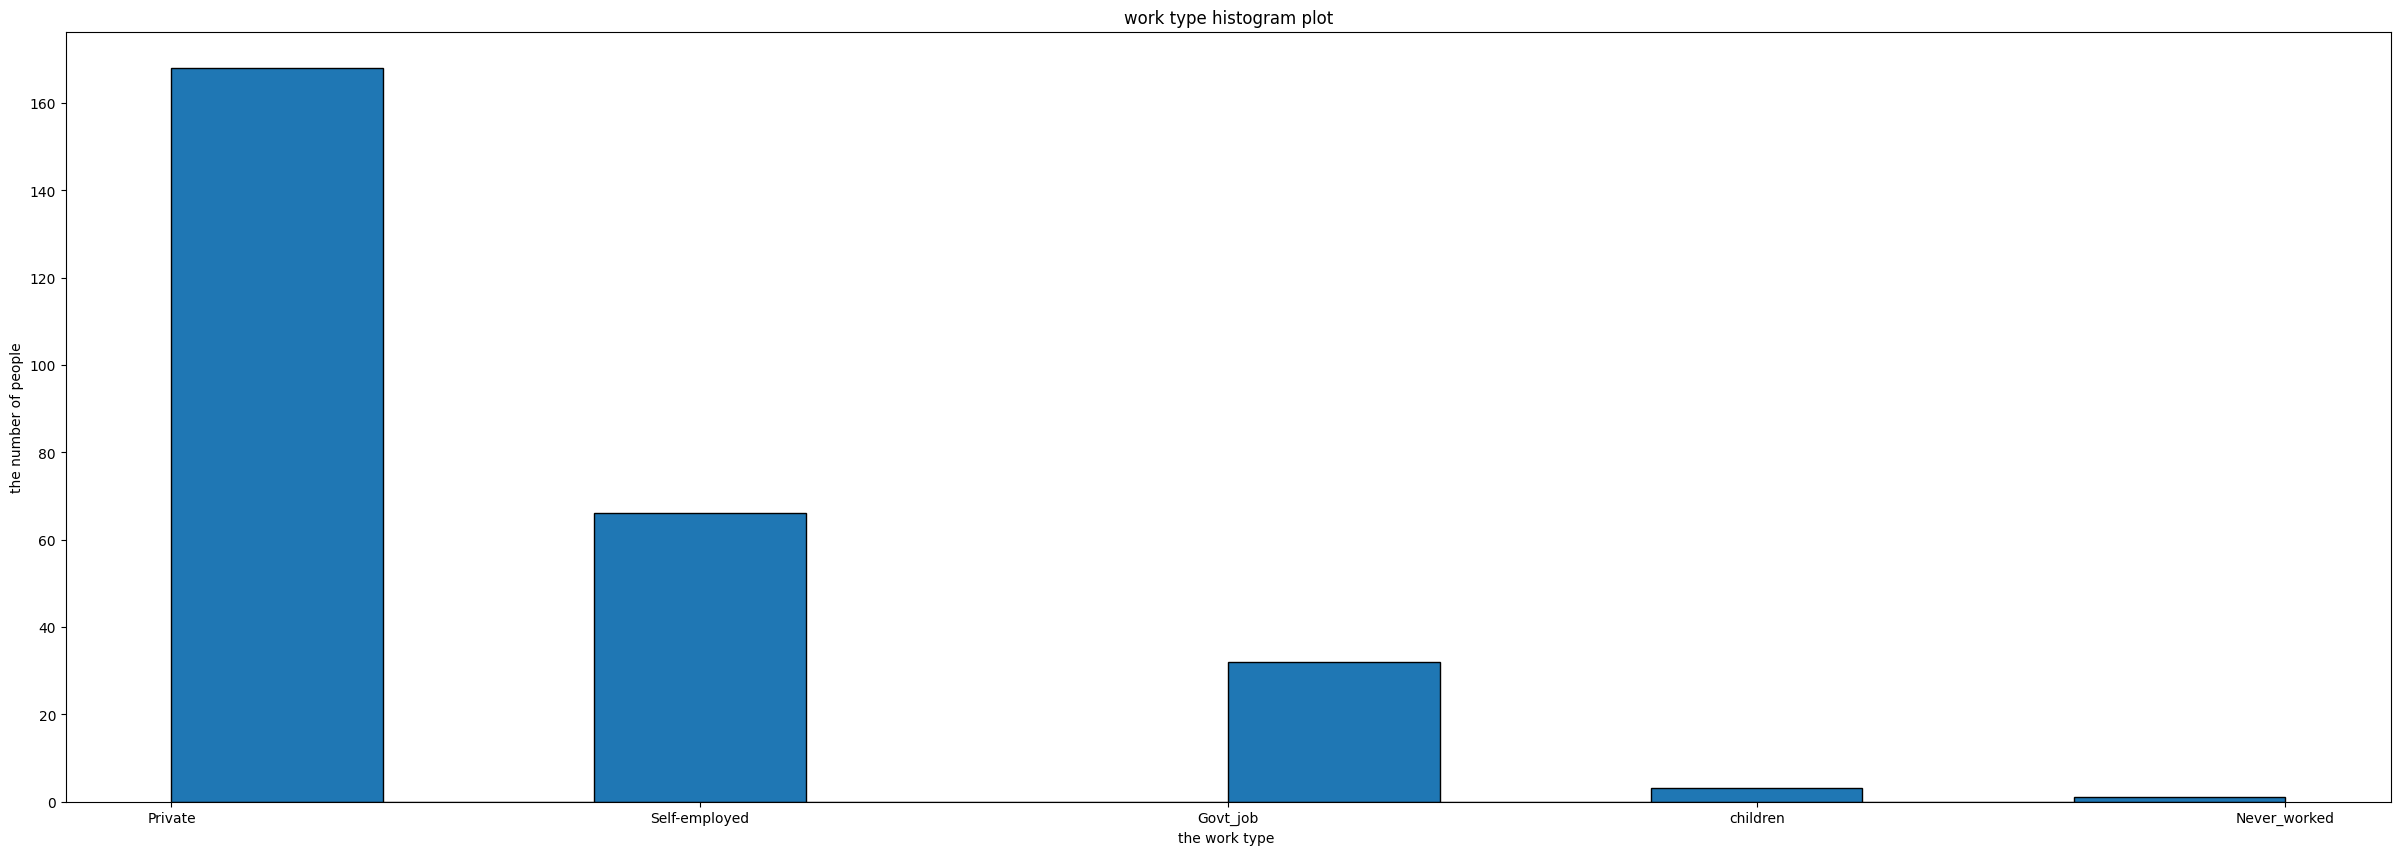

In [ ]:
draw_histogram('work_type',"work type histogram plot","the work type ","the number of people")

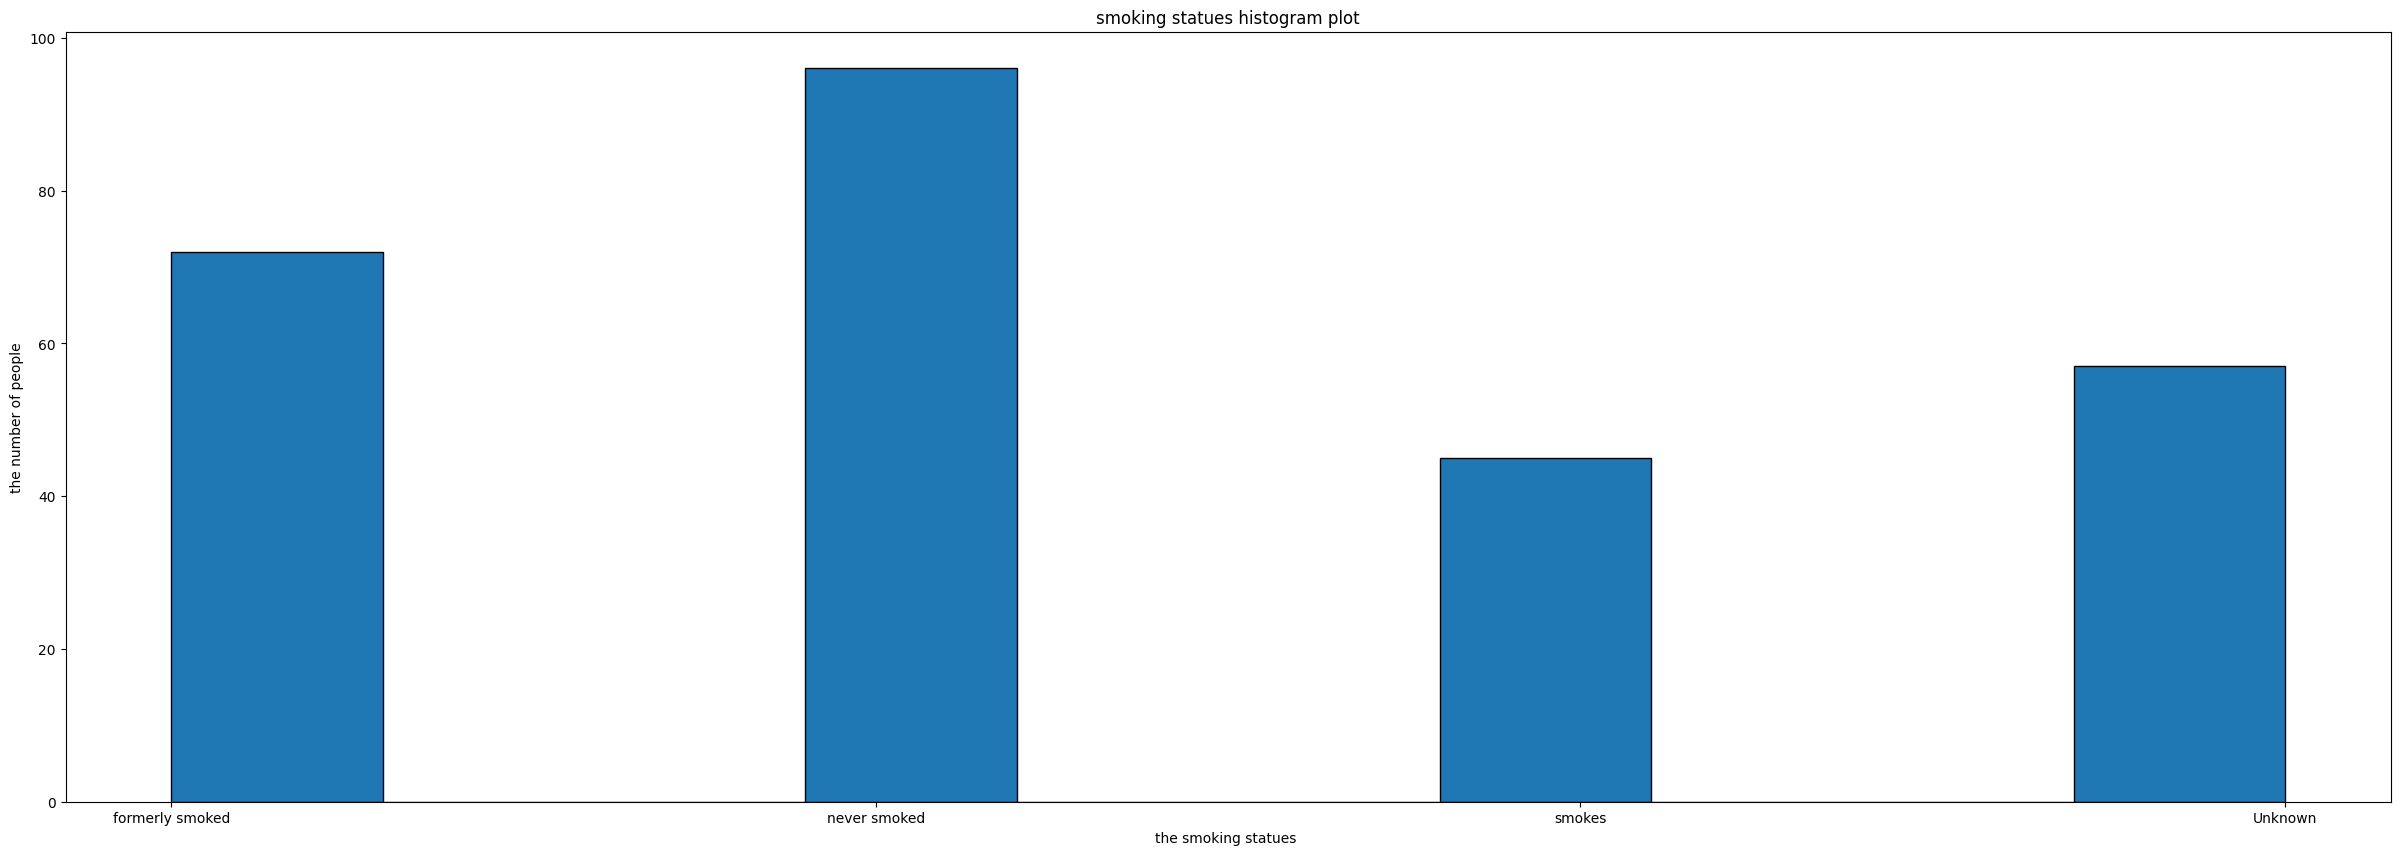

In [ ]:
draw_histogram('smoking_status',"smoking statues histogram plot","the smoking statues ","the number of people")

([<matplotlib.patches.Wedge at 0x7f1e75376800>,
 [Text(-0.6044599013731207, 0.9190365757857504, 'Female'),
  Text(0.6044599013731206, -0.9190365757857505, 'Male')],
 [Text(-0.32970540074897486, 0.5012926777013184, '68.5%'),
  Text(0.3297054007489748, -0.5012926777013184, '31.5%')])

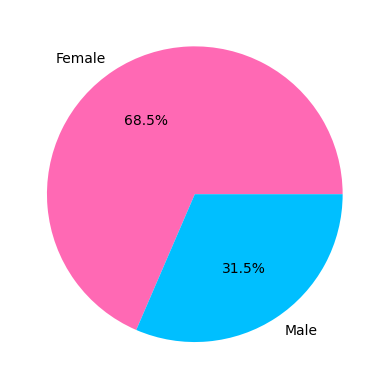

In [ ]:
mylabels = data['Gender'].value_counts().index
plt.pie(data['Gender'].value_counts(), labels= mylabels, autopct='%1.1f%%',colors = ['hotpink','deepskyblue'])


In [ ]:
import plotly.express as ex
ex.pie(data,names='Heart Disease',title="Heart Disease",hole=0.20)

In [ ]:
import plotly.express as ex
ex.pie(data,names='smoking_status',title="smoking_status",hole=0.20)

In [ ]:
import plotly.express as ex
ex.pie(data,names="work_type",title='work_type',hole=0.20)

<Axes: xlabel='smoking_status', ylabel='count'>

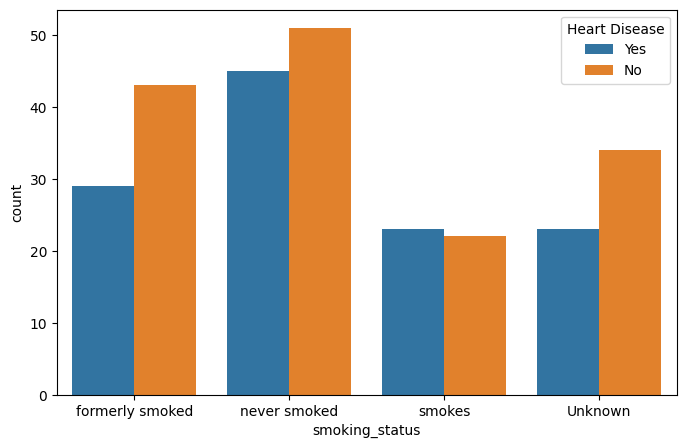

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="smoking_status",hue='Heart Disease' ,data=data)
# relation between smokers and have heart disease


<Axes: xlabel='work_type', ylabel='count'>

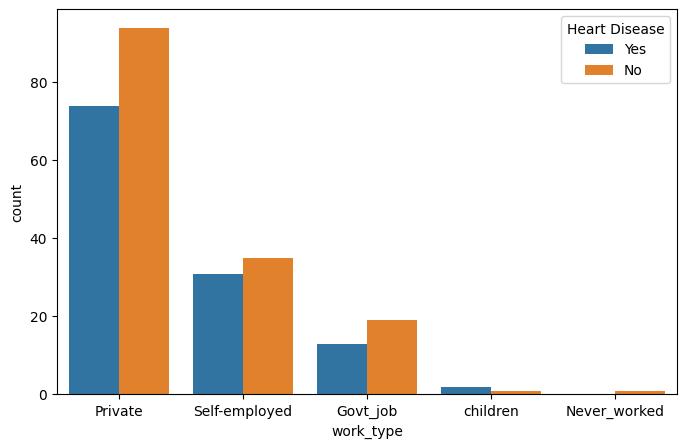

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="work_type",hue='Heart Disease' ,data=data)

# relation between work type and having heart disease

<Axes: xlabel='Age', ylabel='count'>

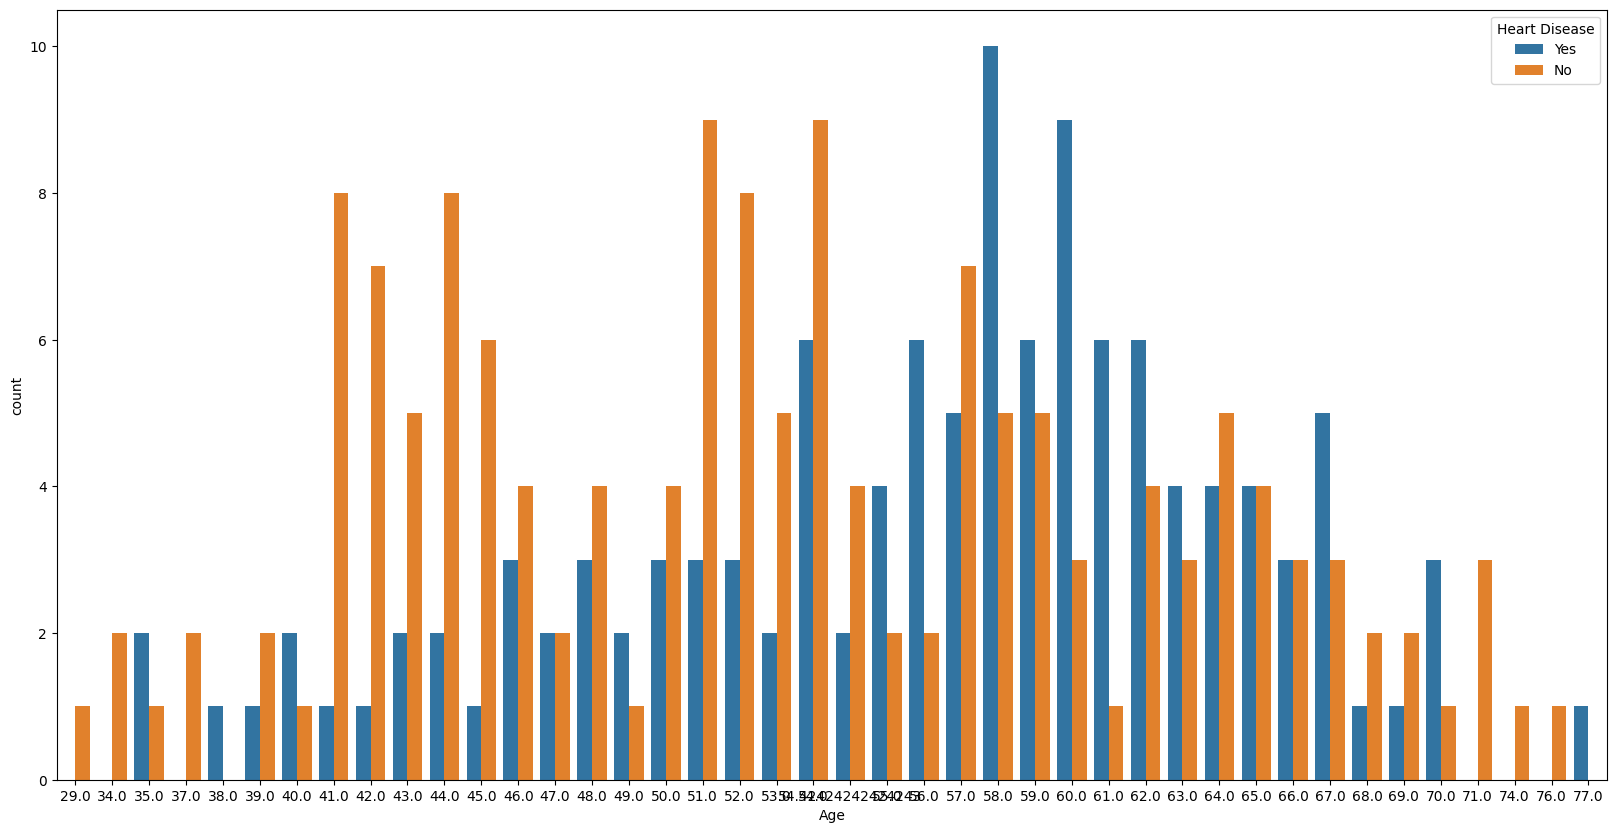

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x="Age",hue='Heart Disease' ,data=data)

# relation between age and having heart disease

<Axes: xlabel='Gender', ylabel='count'>

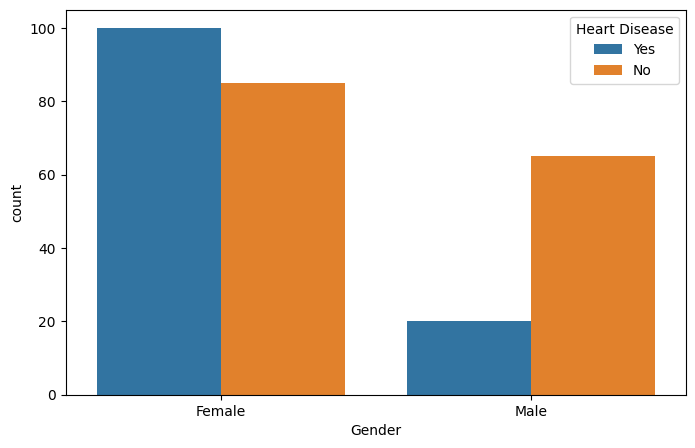

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender",hue='Heart Disease' ,data=data)
# heart disease is more common in which gender

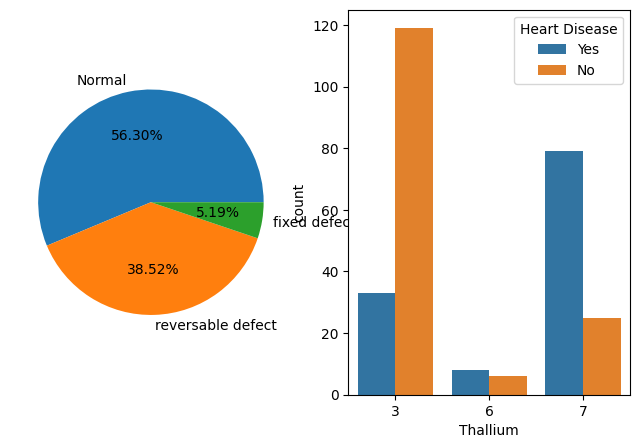

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
label= [ "Normal","reversable defect","fixed defect"]
plt.pie(data["Thallium"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.subplot(1,2,2)
sns.countplot(x="Thallium",hue='Heart Disease' ,data=data)
plt.show()



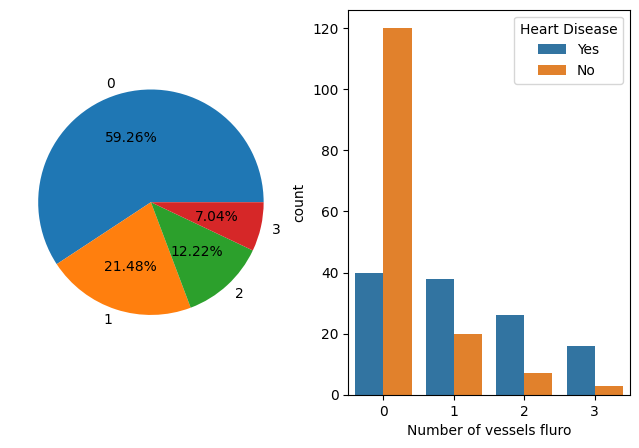

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
label= [ "0","1","2","3"]
plt.pie(data["Number of vessels fluro"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.subplot(1,2,2)
sns.countplot(x="Number of vessels fluro",hue='Heart Disease' ,data=data)
plt.show()



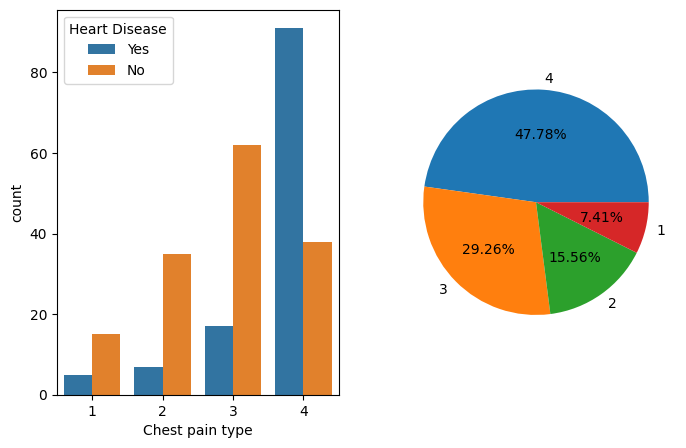

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
sns.countplot(x="Chest pain type",hue='Heart Disease' ,data=data)
plt.subplot(1,2,2)
label= [ "4","3","2","1"]
plt.pie(data["Chest pain type"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

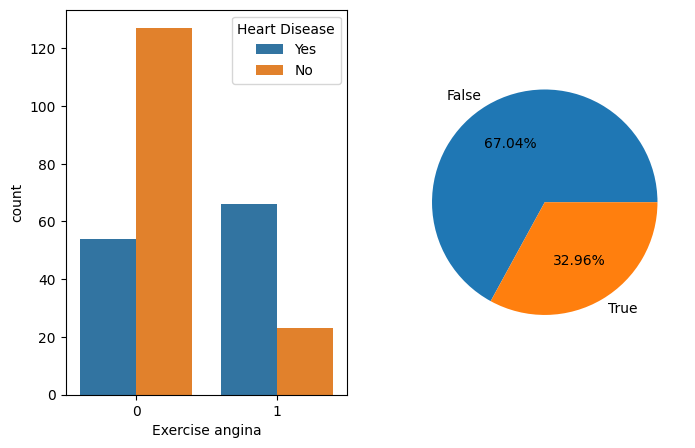

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
sns.countplot(x="Exercise angina",hue='Heart Disease' ,data=data)
plt.subplot(1,2,2)
label= [ "False","True"]
plt.pie(data["Exercise angina"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

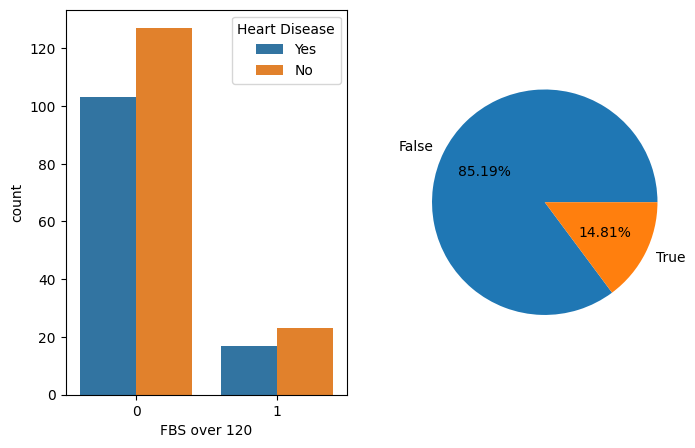

In [ ]:
plt.figure(figsize=(8, 5))
plt.subplot(1,2,1)
sns.countplot(x="FBS over 120",hue='Heart Disease' ,data=data)
plt.subplot(1,2,2)
label= [ "False","True"]
plt.pie(data["FBS over 120"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

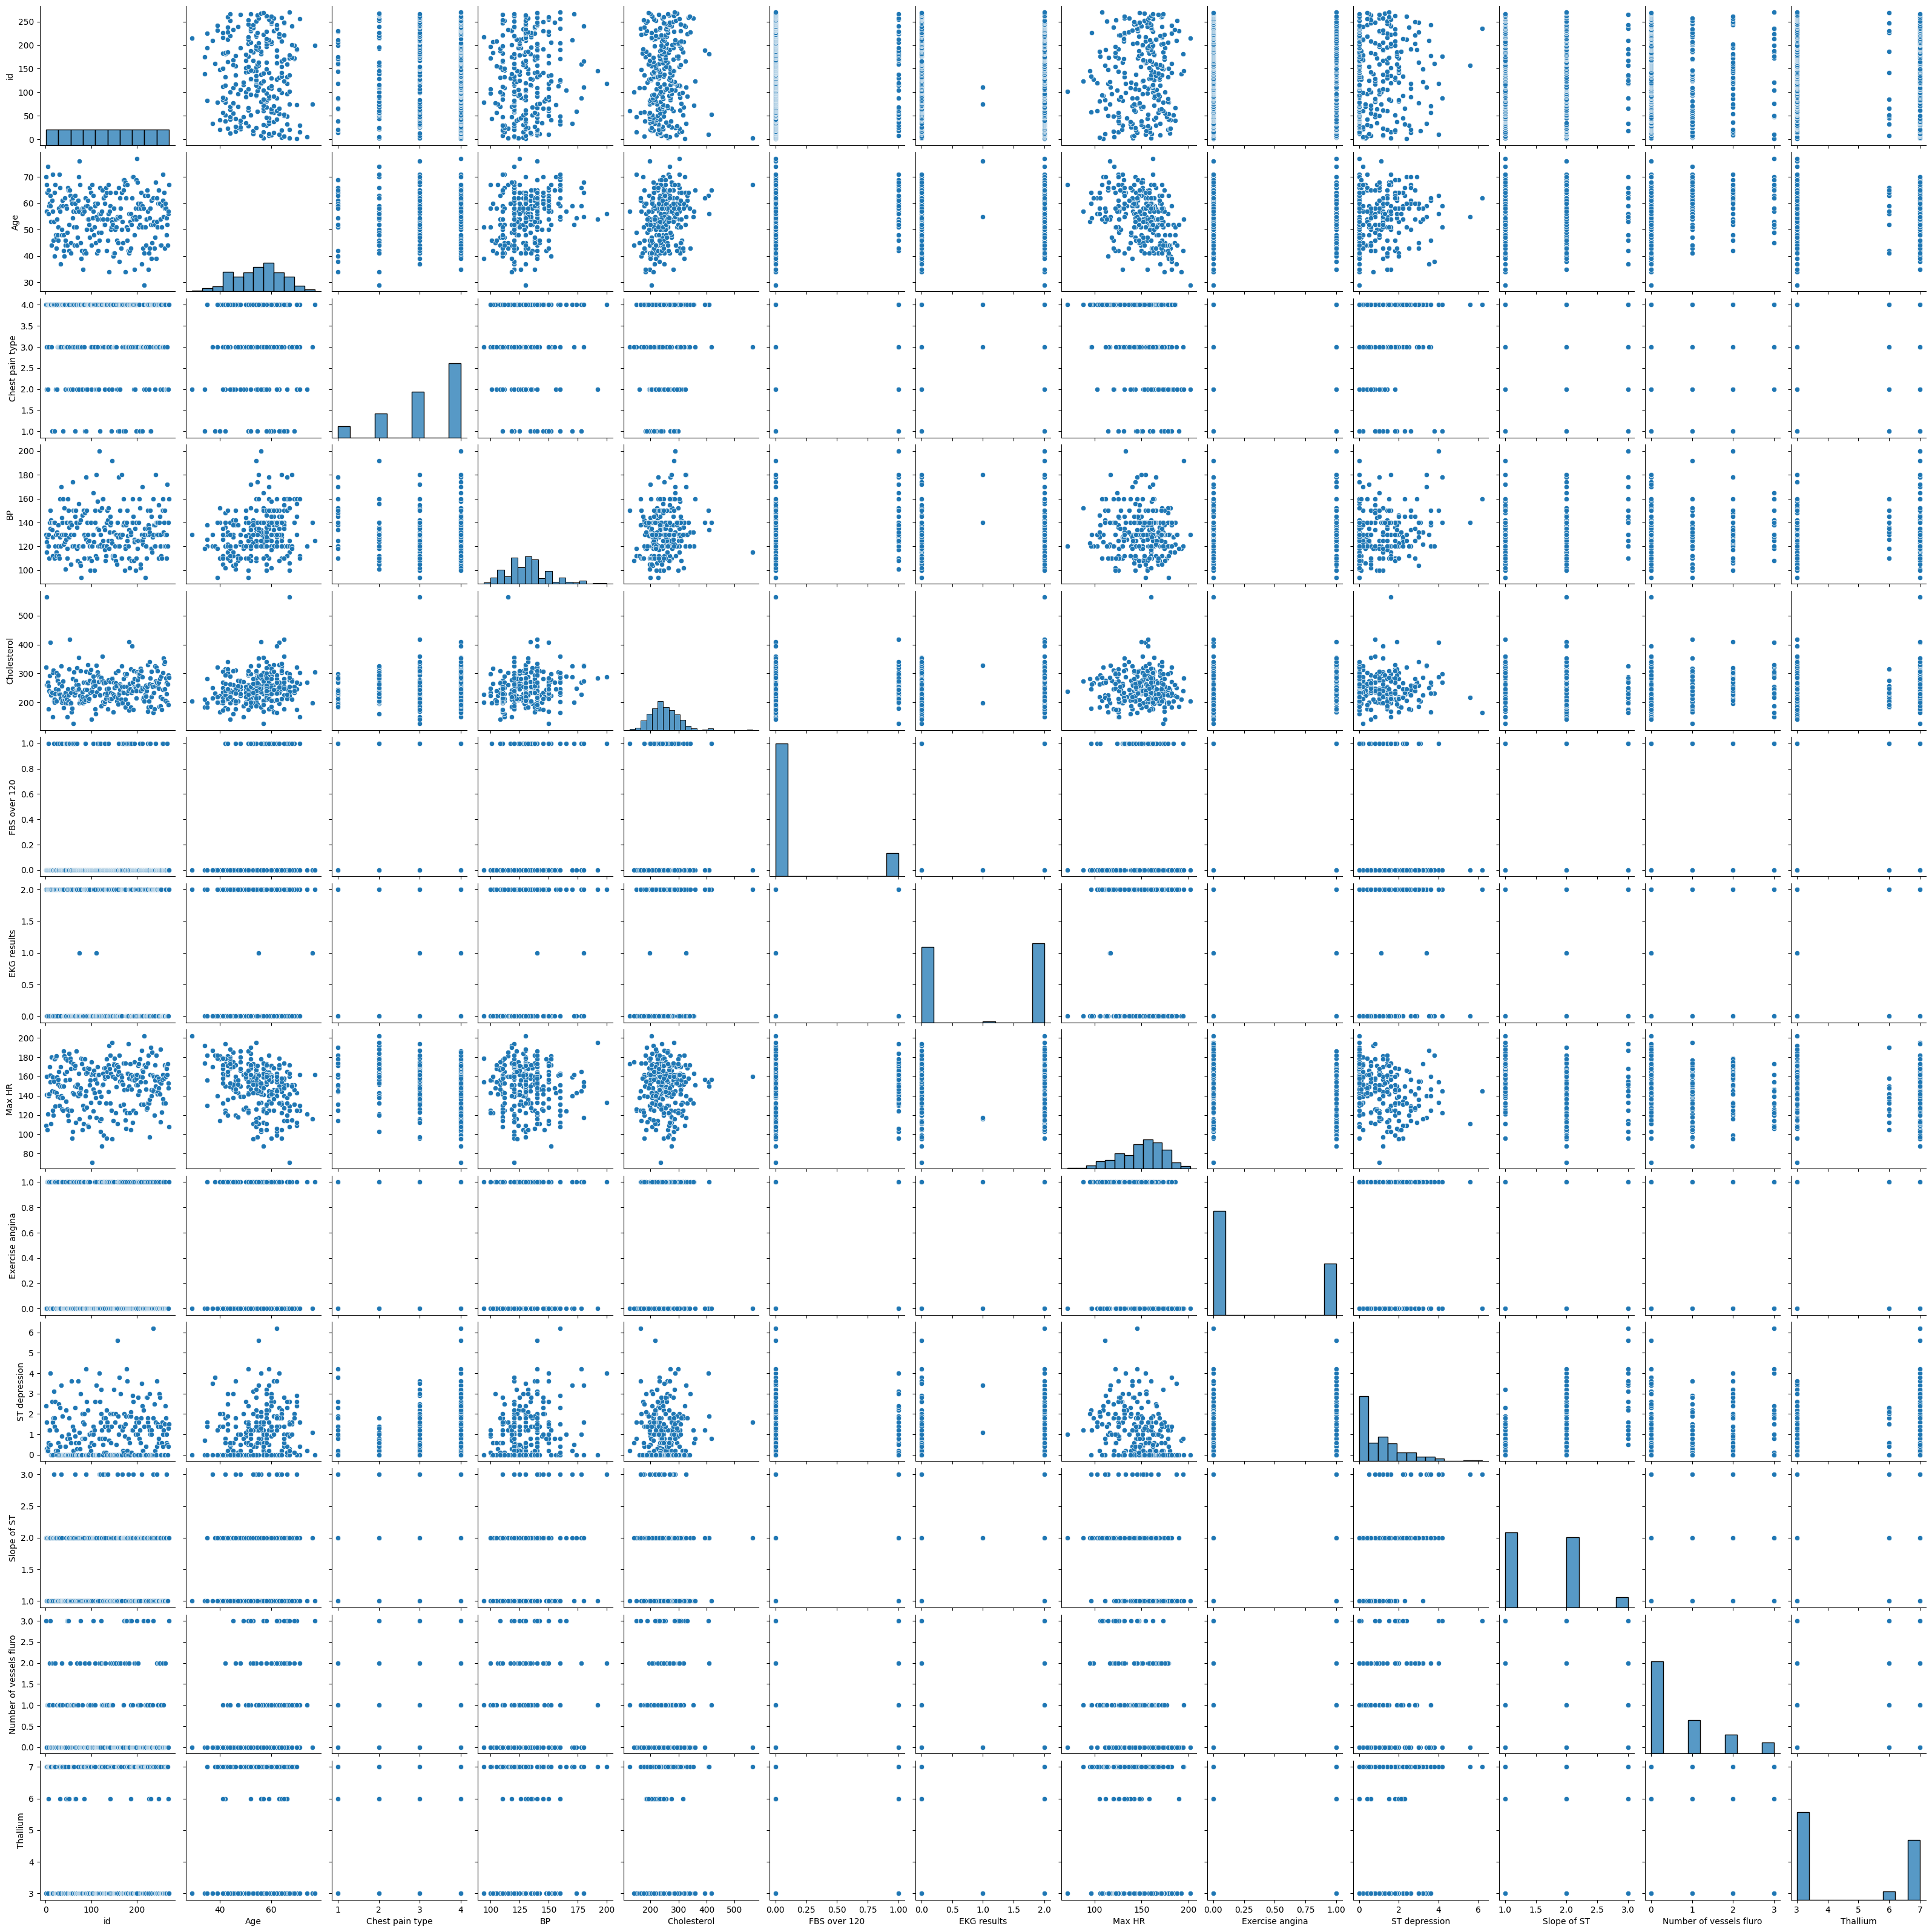

In [ ]:
sns.pairplot(data)

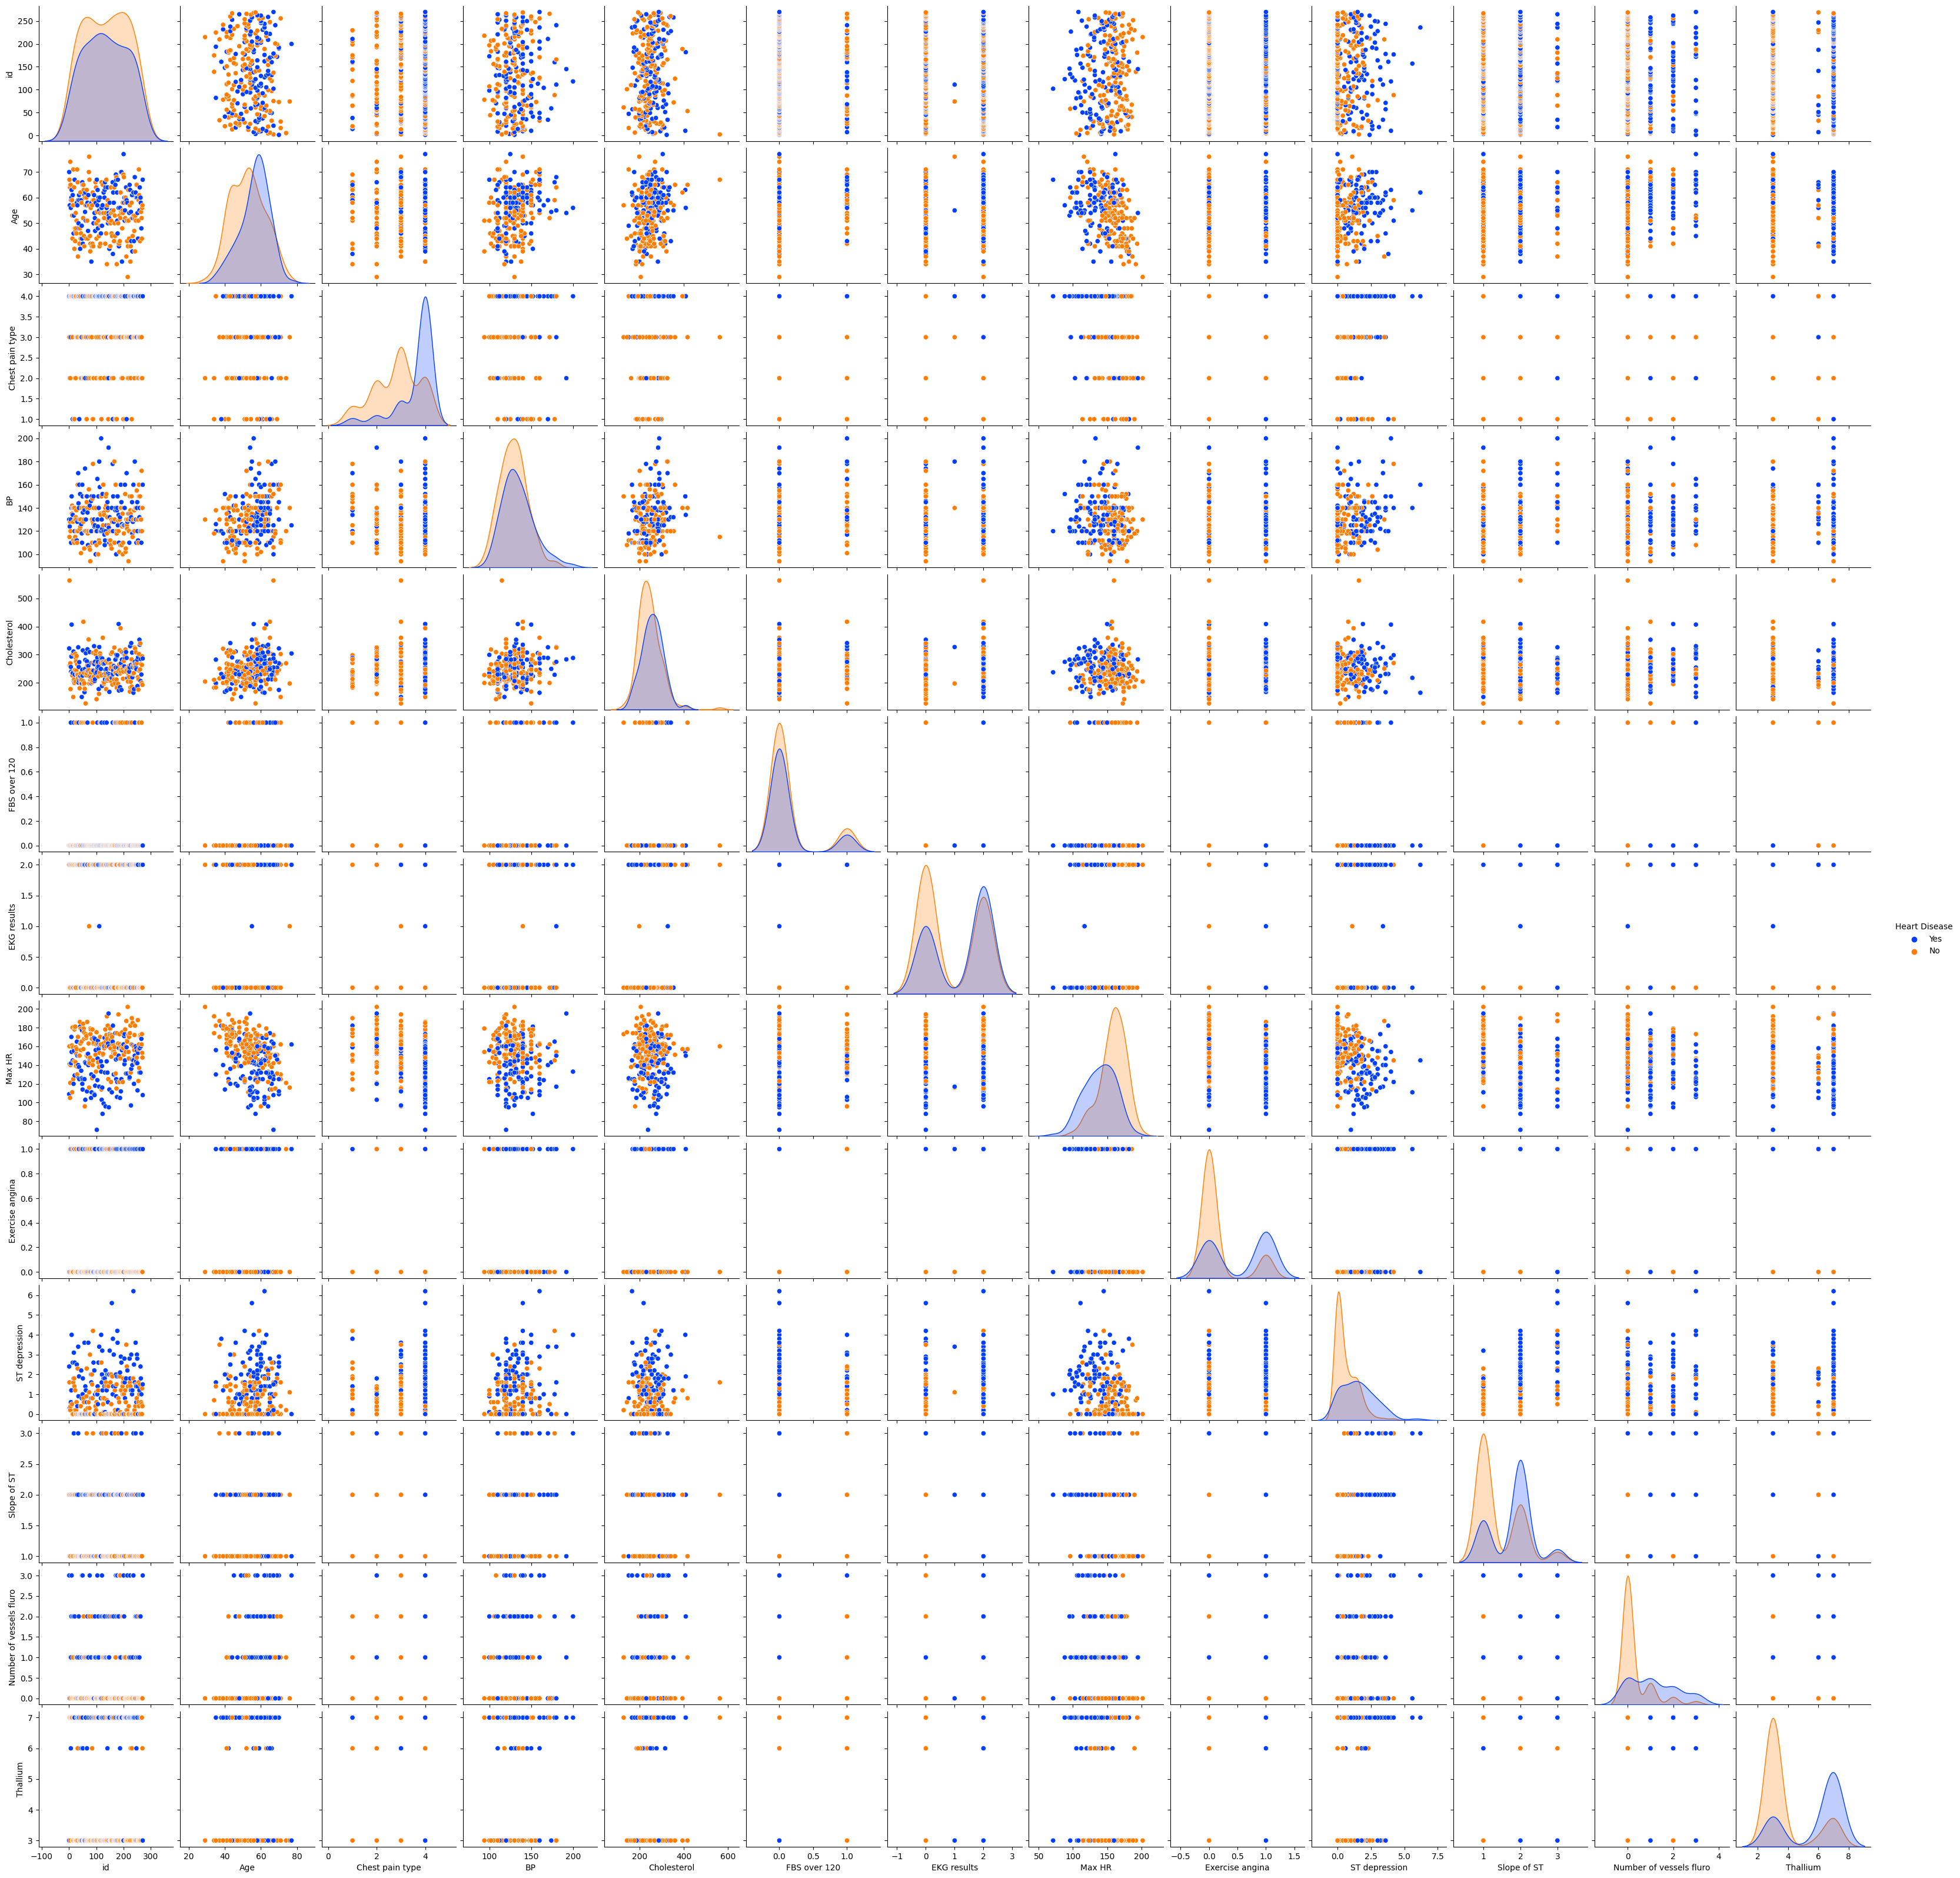

In [ ]:
sns.pairplot(data,hue='Heart Disease',palette='bright')

<Axes: >

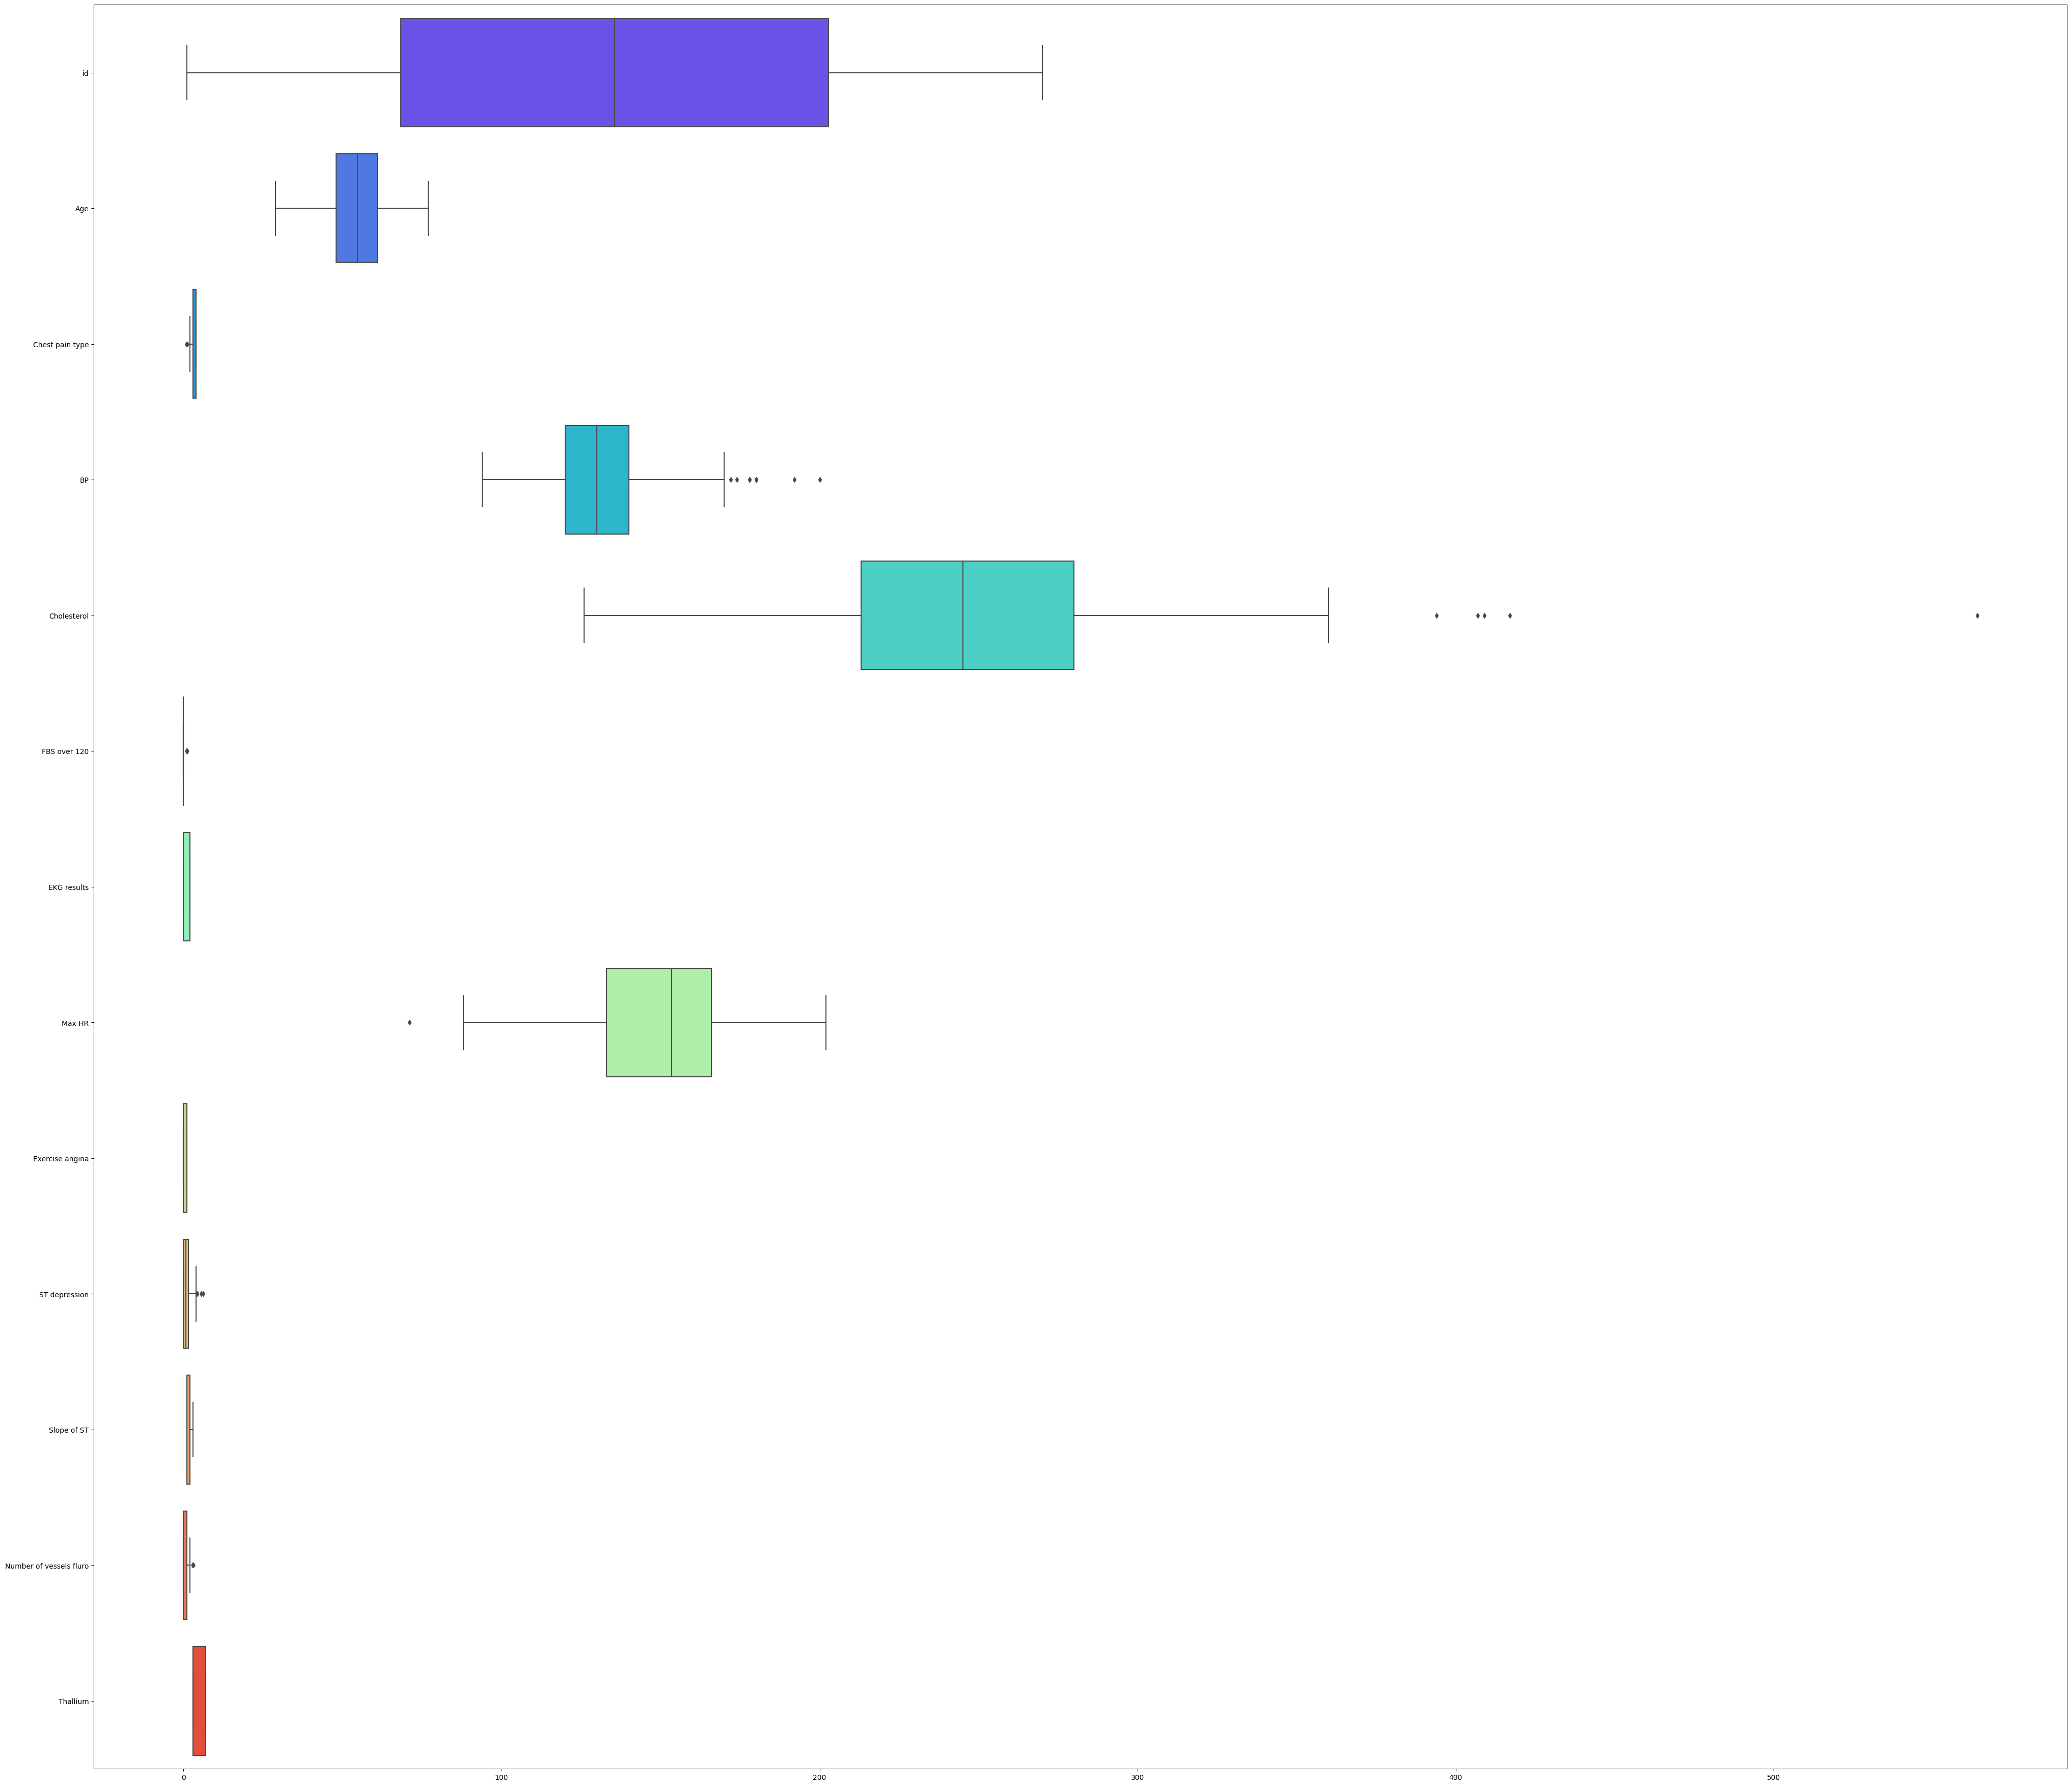

In [ ]:
plt.figure(figsize= (50,45))
sns.boxplot(data=data,palette='rainbow',orient='h')

<Axes: >

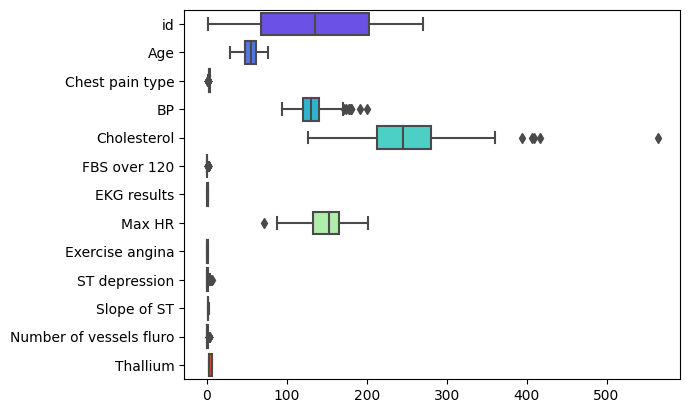

In [ ]:
sns.boxplot(data=data,palette='rainbow',orient='h')
#box plot to all features to show outliers

<ipython-input-42-cafec2e93018>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Cholesterol'>

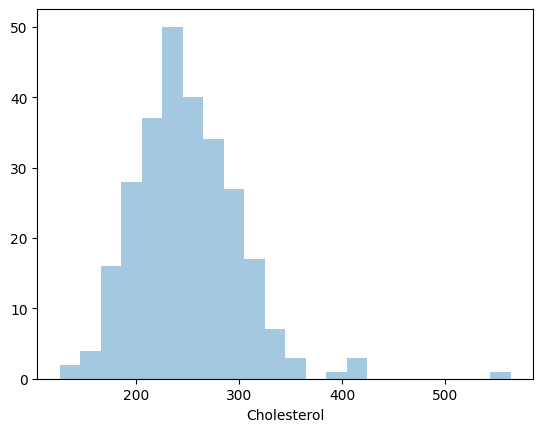

In [ ]:

sns.distplot(data['Cholesterol'],kde=False)

<ipython-input-43-eacfa1adb731>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




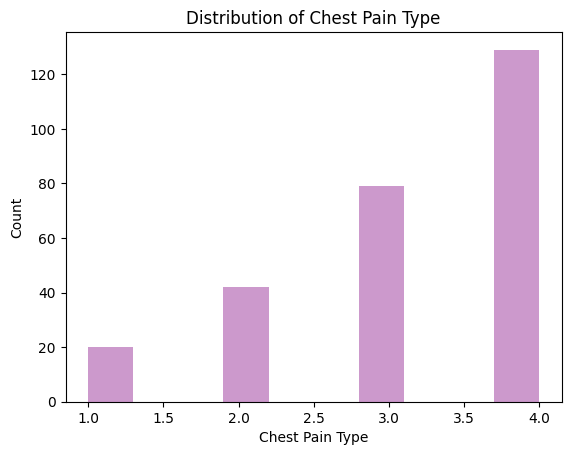

In [ ]:
sns.distplot(data['Chest pain type'], kde=False, color='purple')

sns.set_style('whitegrid')
plt.title('Distribution of Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Show the plot
plt.show()

<ipython-input-44-fc7bdc971e2b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




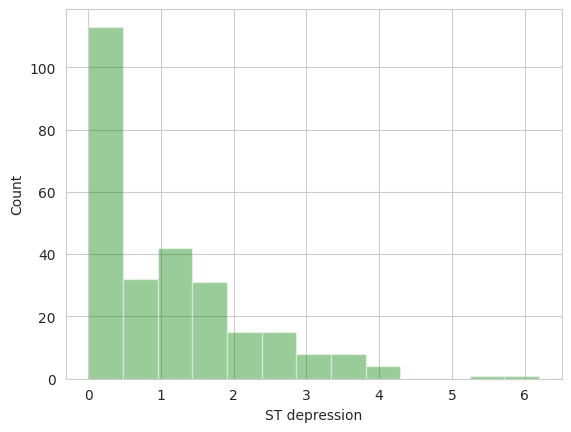

In [ ]:
sns.distplot(data['ST depression'], kde=False, color='green')

sns.set_style('whitegrid')
plt.xlabel('ST depression')
plt.ylabel('Count')

# Show the plot
plt.show()

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




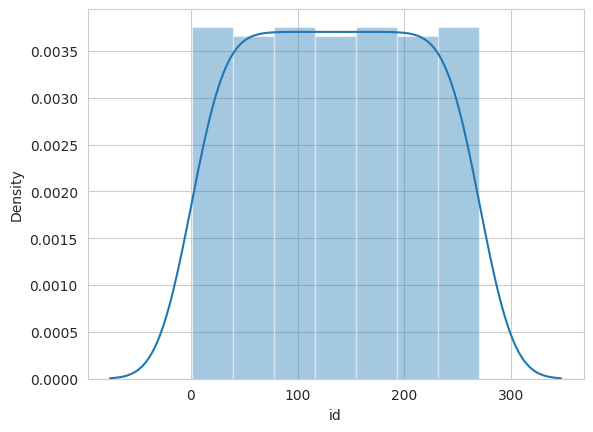

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




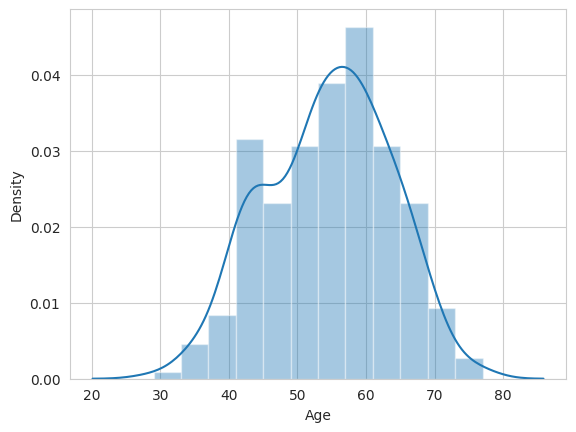

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




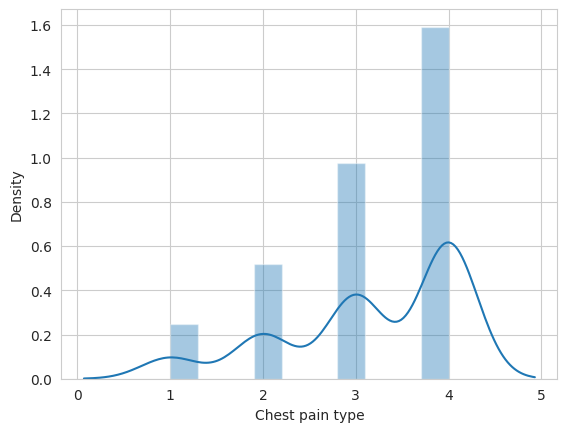

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




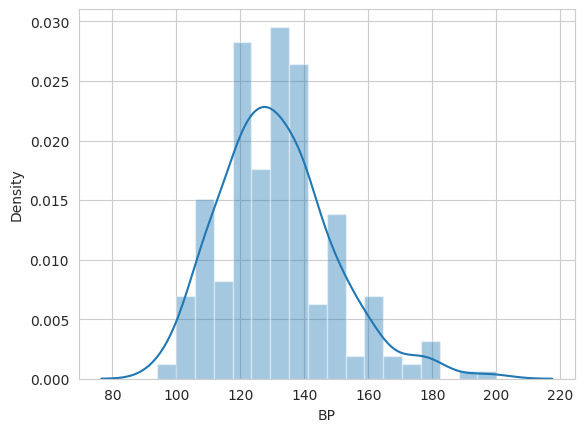

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




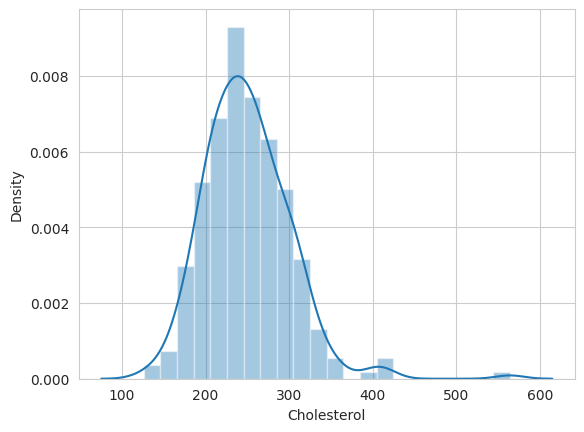

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




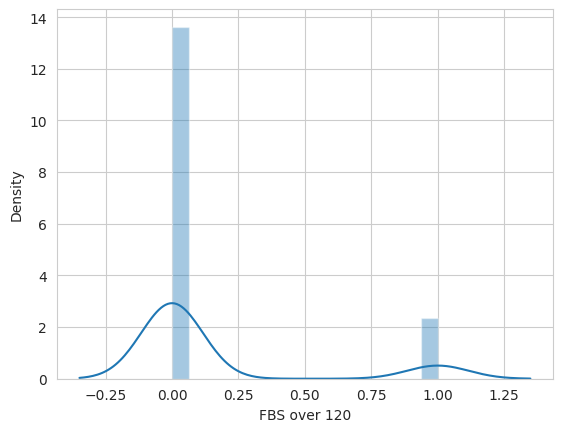

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




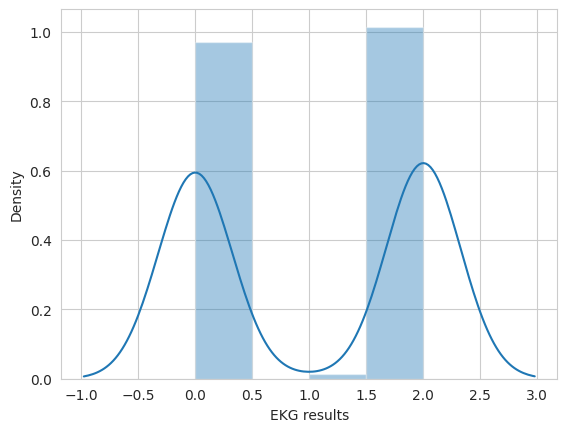

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




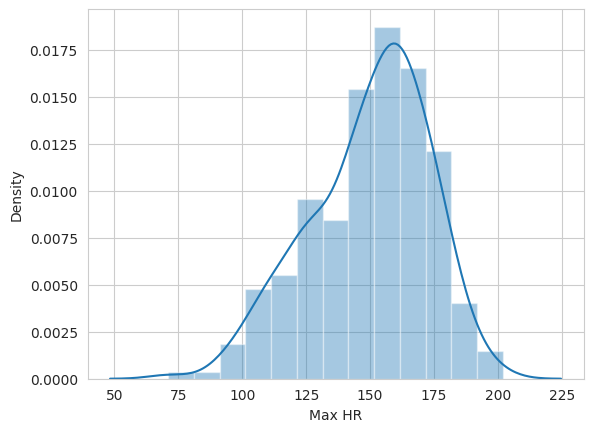

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




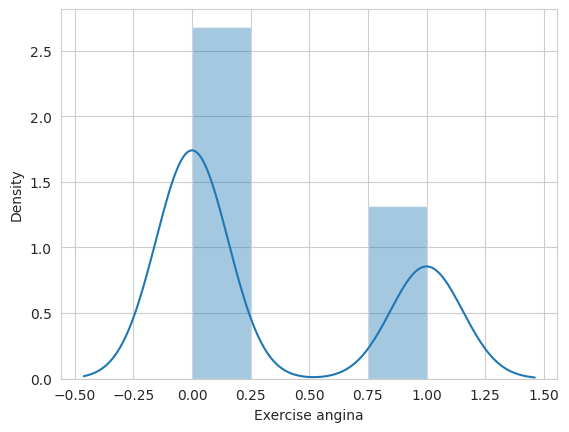

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




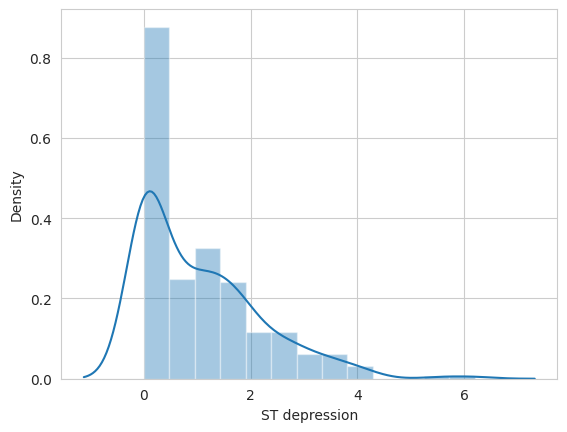

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




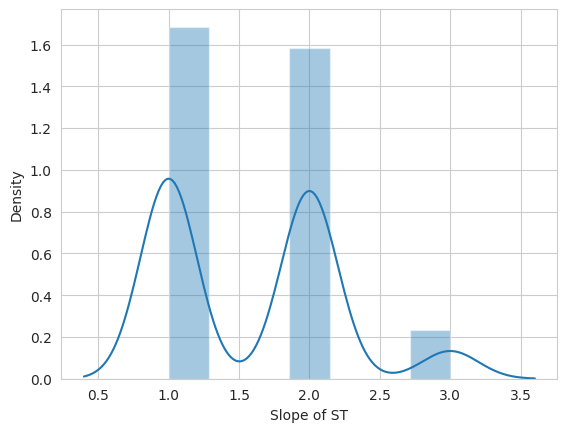

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




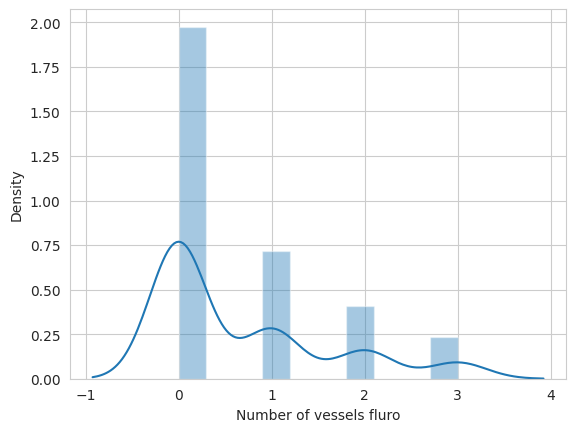

<ipython-input-45-17d402ce0818>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




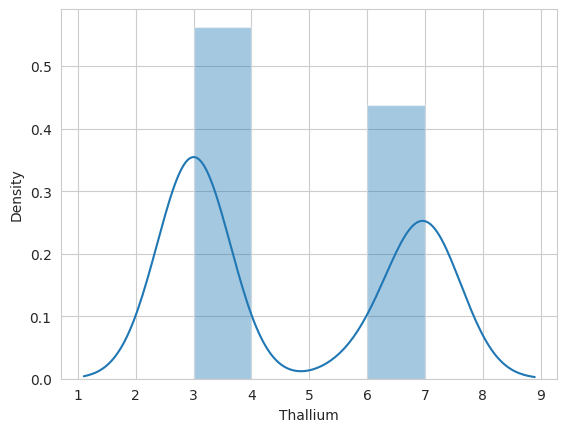

In [ ]:
df_numerical=data.select_dtypes(include=np.number)
for col in df_numerical:
    sns.distplot(data[col], kde = True)
    plt.show()

In [ ]:
duplicate=data.duplicated()
print(duplicate.sum())

0


In [ ]:
sum(data.duplicated('id')) == 0

True

In [ ]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['work_type']= label_encoder.fit_transform(data['work_type'])
data['work_type'].unique()

array([2, 3, 0, 4, 1])

In [ ]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data['smoking_status']= label_encoder.fit_transform(data['smoking_status'])
data['smoking_status'].unique()

array([1, 2, 3, 0])

In [ ]:
encoded_data=one_hot_encoding('Gender')
data=pd.concat([data,encoded_data], axis =1)
data.drop(['Gender'],axis=1,inplace=True)
data.drop(['Gender_Female'],axis=1,inplace=True)

In [ ]:
encoded_data2=one_hot_encoding('Heart Disease')
data=pd.concat([data,encoded_data2], axis =1)
data.drop(['Heart Disease'],axis=1,inplace=True)
data.drop(['Heart Disease_No'],axis=1,inplace=True)

In [ ]:
data.head()

id   Age  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   1  70.0                4  130          322             0            2   
1   2  67.0                3  115          564             0            2   
2   3  57.0                2  124          261             0            0   
3   4  64.0                4  128          263             0            0   
4   5  74.0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  work_type  smoking_status  Gender_Male  \
0                        3         3          2               1            0   
1                        0         7          3               2            1   
2                        0         7          2               2            0   
3                        1         7          2               3            0   
4                        1         3          3               2            1   

   Heart Disease_Yes  
0                  1  
1                  0  
2                  1  
3                  0  
4                  0

In [ ]:
data.shape

(270, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    float64
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  work_type                270 non-null    int64  
 14  smoking_status           2

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3d8f22eba71adbc9d3406e2268b9b6c077a854bb8e01

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.3.0 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-59-e2a33329b6f0>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:
profile=ProfileReport(data)
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#calculating z score to know how far from mean value (by calculating standard deviation)
#help you to know more about data
from scipy import stats
z_score=np.abs(stats.zscore(data))
print (z_score)

           id       Age  Chest pain type        BP  Cholesterol  FBS over 120  \
0    1.725648  1.718484         0.870928  0.075410     1.402212      0.417029   
1    1.712818  1.387492         0.183559  0.916759     6.093004      0.417029   
2    1.699987  0.284185         1.238045  0.411950     0.219823      0.417029   
3    1.687157  1.056500         0.870928  0.187590     0.258589      0.417029   
4    1.674327  2.159807         1.238045  0.636310     0.374890      0.417029   
..        ...       ...              ...       ...          ...           ...   
265  1.674327  0.267468         0.183559  2.280369     0.981951      2.397916   
266  1.687157  1.150114         1.238045  0.636310     0.258589      0.417029   
267  1.699987  0.173854         1.238045  0.485490     0.859476      0.417029   
268  1.712818  0.284185         0.870928  0.485490     1.117635      0.417029   
269  1.725648  1.387492         0.870928  1.607289     0.704409      0.417029   

     EKG results    Max HR 

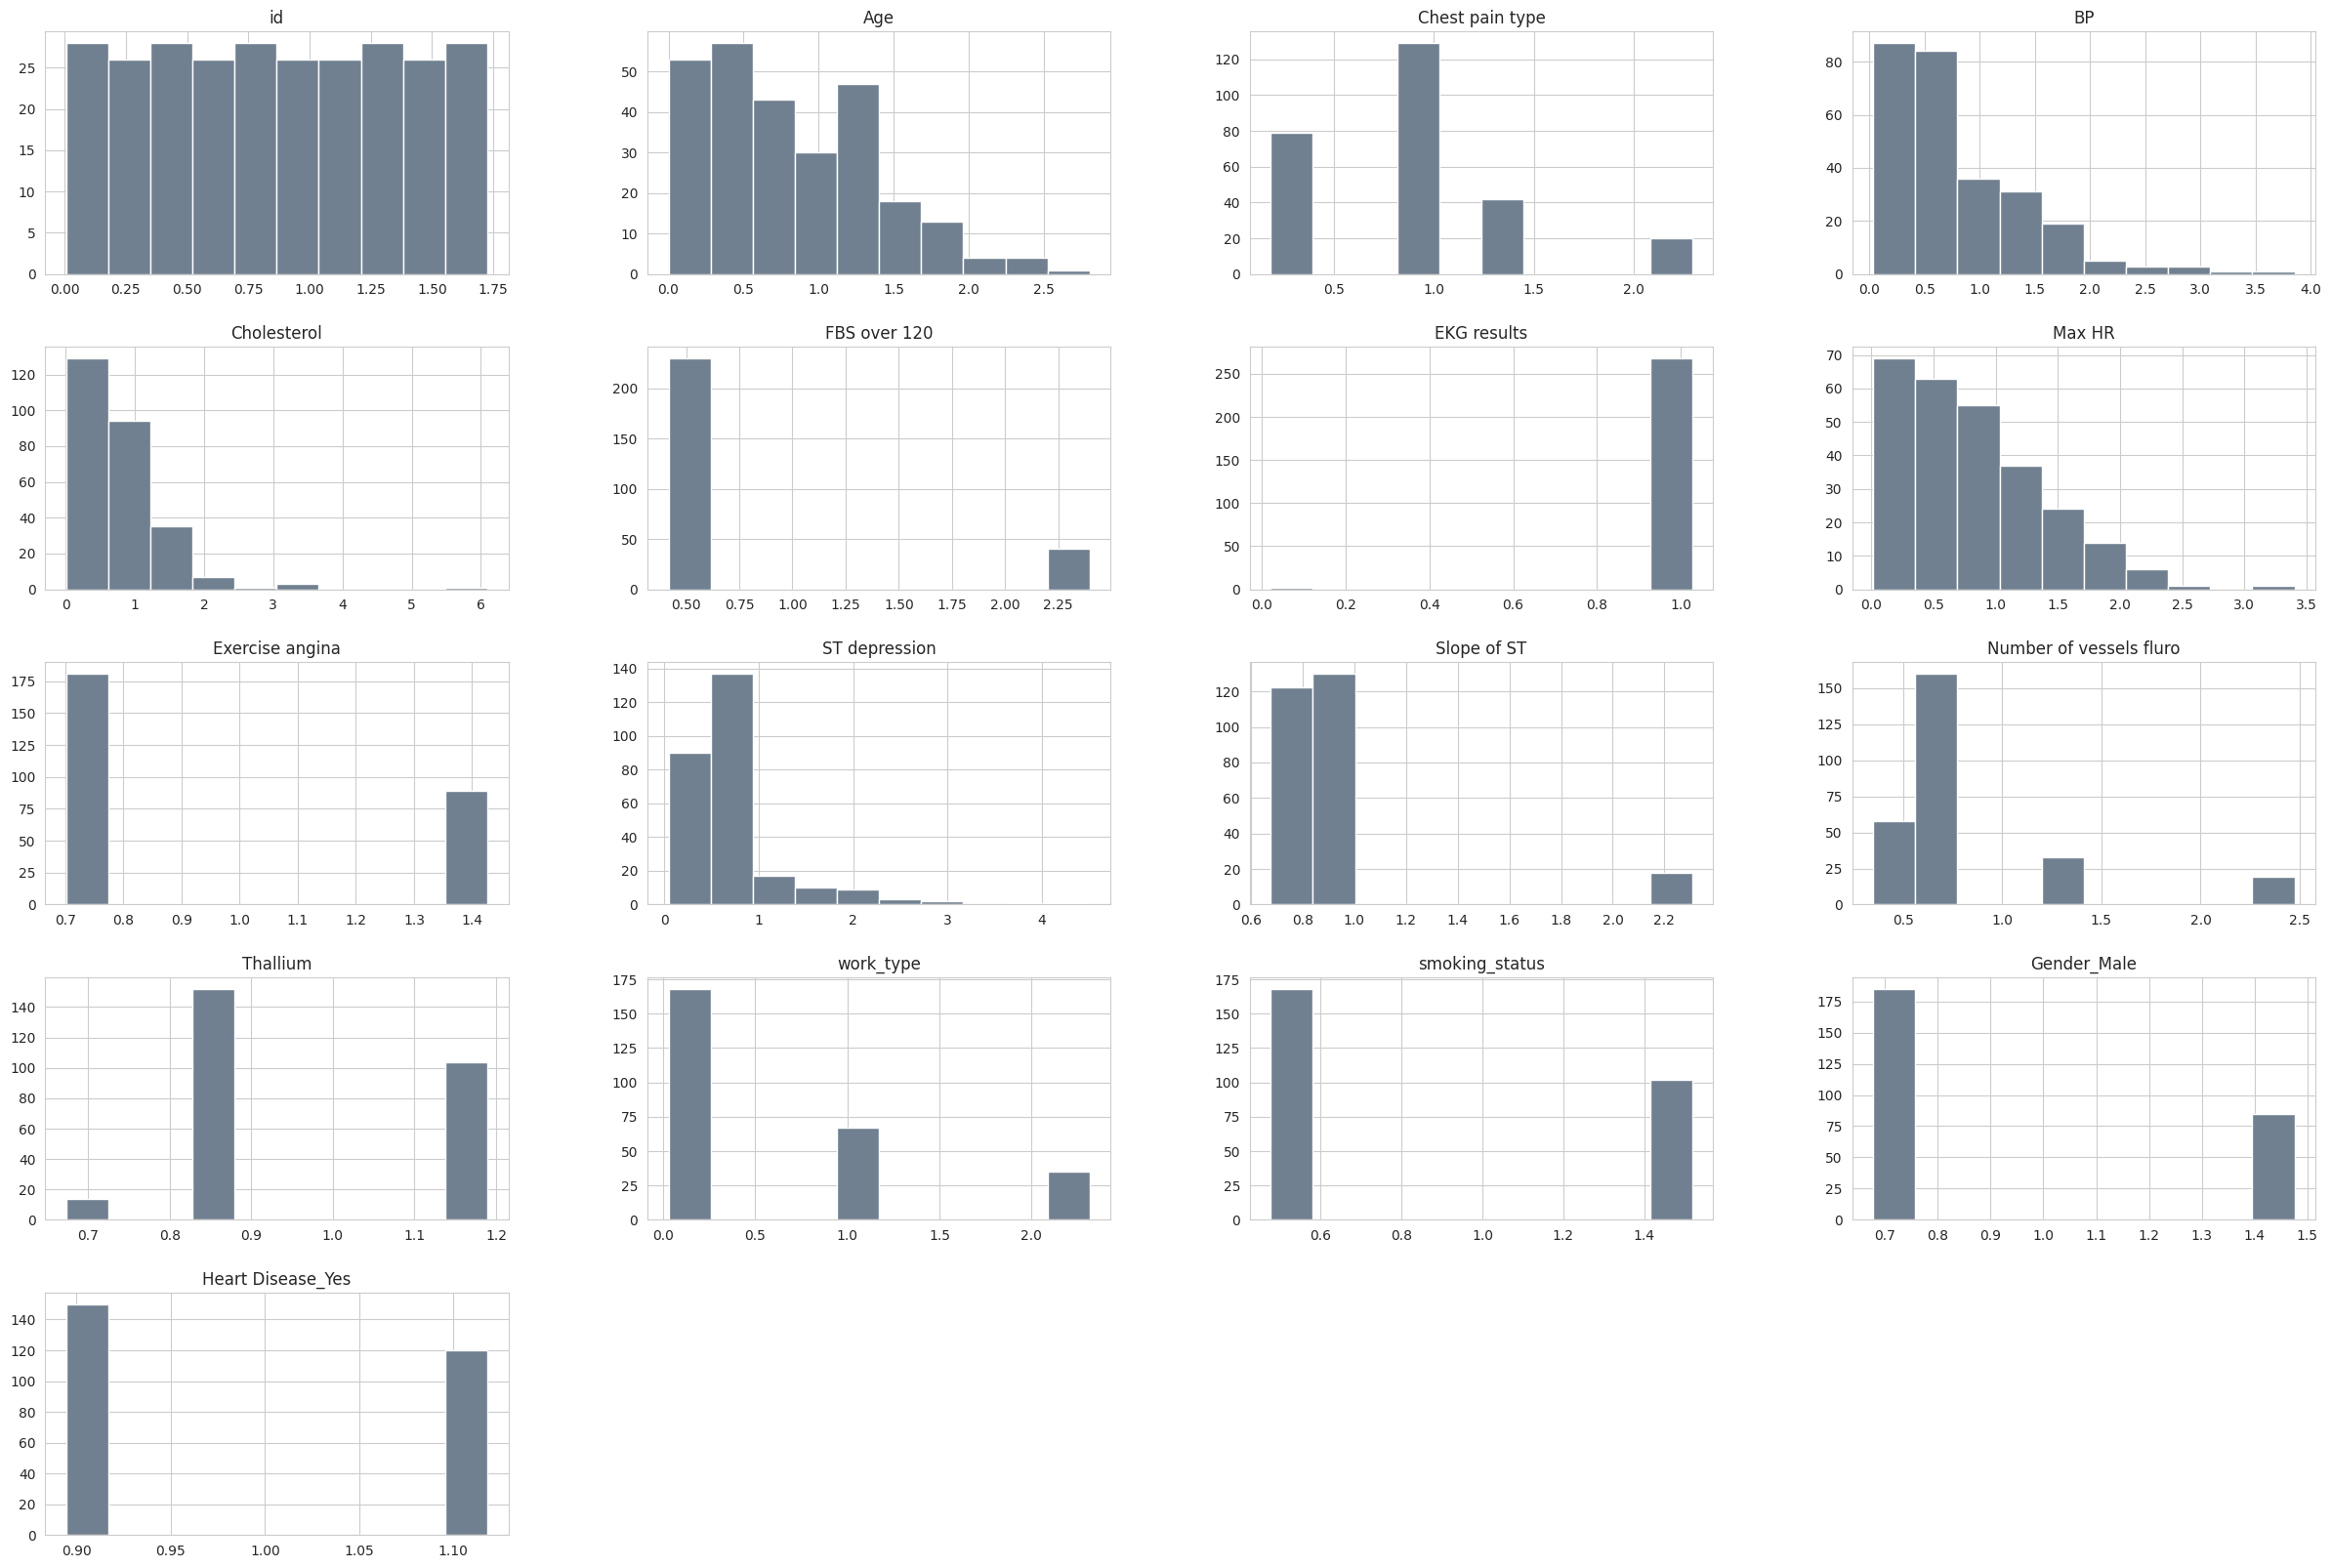

In [ ]:
z_score.hist(color='slategray',figsize=(30,20))
plt.title("Standard Normal Distribution", y=1.015, fontsize=22)
plt.xlabel("z-score", labelpad=14)
plt.ylabel("frequency", labelpad=14);


In [ ]:
data.corr()

id       Age  Chest pain type        BP  \
id                       1.000000 -0.040670        -0.015909  0.042879   
Age                     -0.040670  1.000000         0.096978  0.269831   
Chest pain type         -0.015909  0.096978         1.000000 -0.043196   
BP                       0.042879  0.269831        -0.043196  1.000000   
Cholesterol              0.043509  0.222177         0.090465  0.173019   
FBS over 120            -0.014714  0.124265        -0.098537  0.155681   
EKG results             -0.039836  0.128311         0.074325  0.116157   
Max HR                   0.102682 -0.392833        -0.317682 -0.039136   
Exercise angina         -0.064645  0.095332         0.353160  0.082793   
ST depression            0.084465  0.192792         0.167244  0.222800   
Slope of ST              0.023401  0.152087         0.136900  0.142472   
Number of vessels fluro -0.006128  0.354629         0.225890  0.085697   
Thallium                 0.010033  0.099590         0.262659  0.132045   
work_type                0.065723  0.043832         0.021337 -0.009117   
smoking_status          -0.044721 -0.015032         0.025495 -0.010243   
Gender_Male             -0.034531  0.075852        -0.040332  0.069653   
Heart Disease_Yes       -0.004016  0.203895         0.417436  0.155383   

                         Cholesterol  FBS over 120  EKG results    Max HR  \
id                          0.043509     -0.014714    -0.039836  0.102682   
Age                         0.222177      0.124265     0.128311 -0.392833   
Chest pain type             0.090465     -0.098537     0.074325 -0.317682   
BP                          0.173019      0.155681     0.116157 -0.039136   
Cholesterol                 1.000000      0.025186     0.167652 -0.018739   
FBS over 120                0.025186      1.000000     0.053499  0.022494   
EKG results                 0.167652      0.053499     1.000000 -0.074628   
Max HR                     -0.018739      0.022494    -0.074628  1.000000   
Exercise angina             0.078243     -0.004107     0.095098 -0.380719   
ST depression               0.027709     -0.025538     0.120034 -0.349045   
Slope of ST                -0.005755      0.044076     0.160614 -0.386847   
Number of vessels fluro     0.126541      0.123774     0.114368 -0.265333   
Thallium                    0.028836      0.049237     0.007337 -0.253397   
work_type                   0.101006     -0.036178     0.071565  0.003341   
smoking_status              0.050696      0.009244     0.070966 -0.007099   
Gender_Male                 0.200631     -0.035750    -0.055154  0.085319   
Heart Disease_Yes           0.118021     -0.016319     0.182091 -0.418514   

                         Exercise angina  ST depression  Slope of ST  \
id                             -0.064645       0.084465     0.023401   
Age                             0.095332       0.192792     0.152087   
Chest pain type                 0.353160       0.167244     0.136900   
BP                              0.082793       0.222800     0.142472   
Cholesterol                     0.078243       0.027709    -0.005755   
FBS over 120                   -0.004107      -0.025538     0.044076   
EKG results                     0.095098       0.120034     0.160614   
Max HR                         -0.380719      -0.349045    -0.386847   
Exercise angina                 1.000000       0.274672     0.255908   
ST depression                   0.274672       1.000000     0.609712   
Slope of ST                     0.255908       0.609712     1.000000   
Number of vessels fluro         0.153347       0.255005     0.109498   
Thallium                        0.321449       0.324333     0.283678   
work_type                       0.042244      -0.015734    -0.000664   
smoking_status                  0.105922      -0.071264     0.015128   
Gender_Male                    -0.169956      -0.093831    -0.048643   
Heart Disease_Yes               0.419303       0.417967     0.337616   

              

<Axes: >

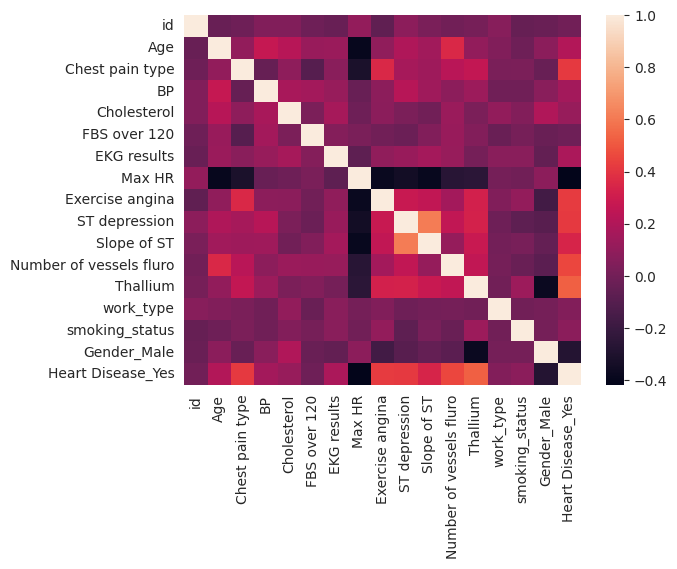

In [ ]:
sns.heatmap(data.corr())

<Axes: >

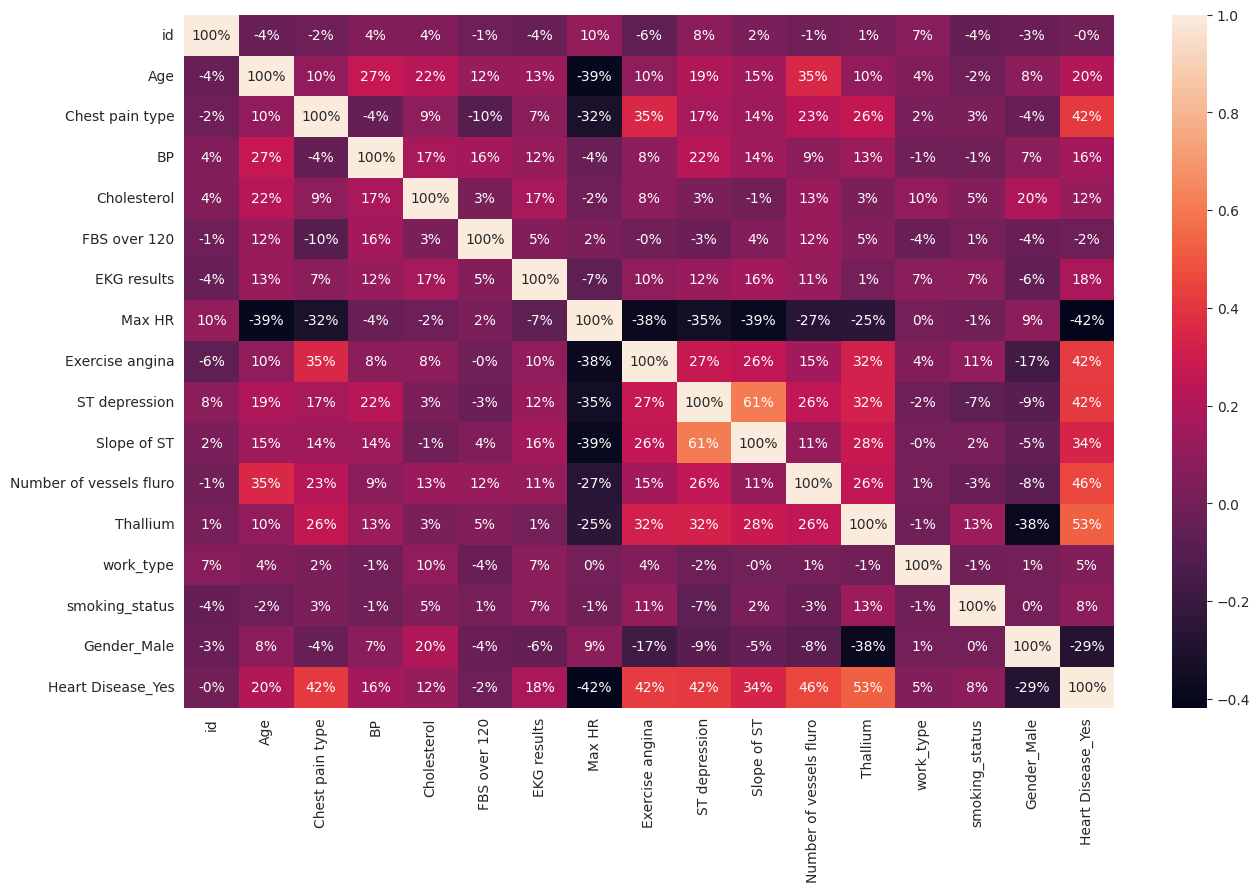

In [ ]:
#visualize correlation between different features by showing percentage in heatmap
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

In [ ]:
data.columns

Index(['id', 'Age', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'work_type',
       'smoking_status', 'Gender_Male', 'Heart Disease_Yes'],
      dtype='object')

# Feature Engineering & Selection

* Age: Age is a known risk factor for heart disease and is often used as a predictor in heart disease models.

* Chest pain type: Chest pain is a common symptom of heart disease, and the type of chest pain (e.g., typical angina, atypical angina, non-anginal pain) can provide information about the severity and type of heart disease.

* BP: High blood pressure is a risk factor for heart disease, and measuring blood pressure can provide information about a patient's cardiovascular health.

* Cholesterol: High levels of cholesterol in the blood can contribute to the development of heart disease, and measuring cholesterol levels can provide information about a patient's risk.

* FBS over 120: High levels of fasting blood sugar can be a risk factor for heart disease, and measuring FBS levels can provide information about a patient's diabetes risk.

* Max HR: Maximum heart rate during exercise can provide information about a patient's cardiovascular fitness and health.

* Exercise angina: The presence of angina during exercise can indicate the presence of underlying heart disease.

* ST depression: ST depression on an ECG can indicate the presence of underlying heart disease.

* Number of vessels fluro: The number of coronary vessels that appear blocked or narrowed on a fluroscopy can provide information about the severity of heart disease.

* Thallium: Thallium is a radioactive substance that is sometimes used in stress tests to evaluate blood flow to the heart. Abnormalities in thallium uptake can indicate the presence of underlying heart disease.

* Gender_Male: Gender may be a relevant factor in heart disease risk assessment, as men are generally at higher risk for heart disease than women.

* EKG results: Electrocardiogram (EKG) results can provide information about the electrical activity of the heart and can detect abnormalities that may be indicative of heart disease. For example, ST segment abnormalities on an EKG may be associated with ischemia (restricted blood flow) to the heart, which can be a sign of underlying heart disease.

* Slope of ST: The slope of the ST segment on an EKG can provide additional information about the severity and location of ischemia (restricted blood flow) to the heart. A more severe slope may indicate a higher degree of ischemia and a greater risk of heart disease.

* Work type: The type of work a person does may be associated with risk factors for heart disease. For example, sedentary work or jobs that involve exposure to certain chemicals or pollutants may increase the risk of heart disease.

* Smoking status: Smoking is a well-known risk factor for heart disease and is associated with an increased risk of heart attack, stroke, and other cardiovascular diseases. Knowing a person's smoking status can provide important information about their overall cardiovascular health.

In [ ]:
x=data.drop(['Heart Disease_Yes'],axis=1)
y=data['Heart Disease_Yes']

In [ ]:
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
from sklearn.feature_selection import SelectKBest , SelectPercentile , mutual_info_classif

## Mutual information Classifier

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(x,y)
print(mi_score)

[0.02820925 0.03171108 0.15519657 0.         0.05017828 0.
 0.00950989 0.07527642 0.0631014  0.08306552 0.10217085 0.11018822
 0.17089157 0.         0.00357665 0.04319847]


In [ ]:
selector=SelectKBest(mutual_info_classif,k=10)
x_selected=selector.fit_transform(x,y)
cols=selector.get_support(indices=True)
selected_features = x.iloc[:,cols].columns.tolist()
selected_features

['id',
 'Chest pain type',
 'Cholesterol',
 'FBS over 120',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

## chi2

In [ ]:
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(x,y)
df_scores= pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(x.columns)
features_score =pd.concat([df_col,df_scores], axis=1)
features_score.columns=['feature','score']
features_score.sort_values(by=['score'],ascending=False)

feature       score
7                    Max HR  168.929831
11  Number of vessels fluro   74.122652
12                 Thallium   59.463091
9             ST depression   58.697286
4               Cholesterol   40.093093
8           Exercise angina   31.822472
1                       Age   16.942985
3                        BP   15.775632
15              Gender_Male   15.058824
2           Chest pain type   13.330455
6               EKG results    8.688587
10              Slope of ST    7.301402
14           smoking_status    1.154887
13                work_type    0.256764
0                        id    0.195277
5              FBS over 120    0.061250

## ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.0449065  0.05148594 0.09667206 0.0455427  0.04827686 0.01730024
 0.03200916 0.0591934  0.08554798 0.06354452 0.05404106 0.11545899
 0.17865814 0.03117993 0.03998327 0.03619926]


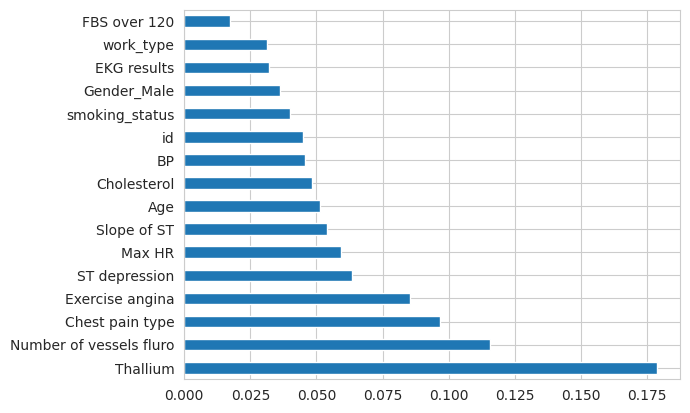

In [ ]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

## final prepare for modeling

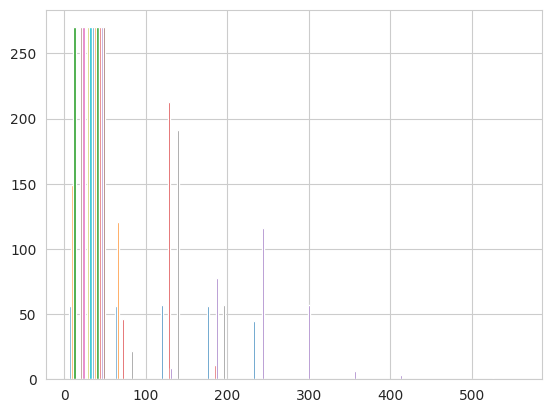

In [ ]:
plt.hist(x)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


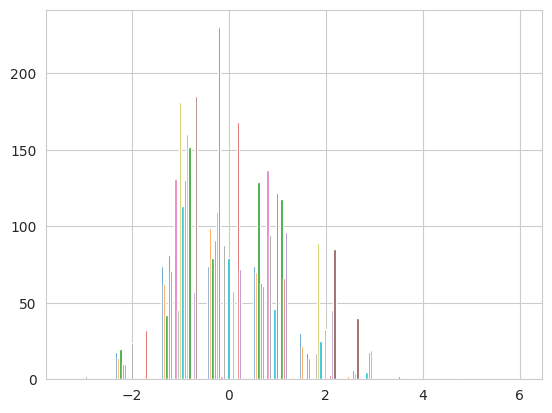

In [ ]:
plt.hist(x)
plt.show()


In [ ]:
features=data.drop(['id','smoking_status','work_type','FBS over 120','Heart Disease_Yes'],axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(features)


In [ ]:
y.value_counts()

0    150
1    120
Name: Heart Disease_Yes, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=44,test_size=0.2)

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
accuracy_score(y_test, y_pred)

0.9259259259259259

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:. Logistic Regression Model Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. Logistic Regression Model Accuracy: 92.59% .:.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  1]
 [ 3 24]]


<Axes: >

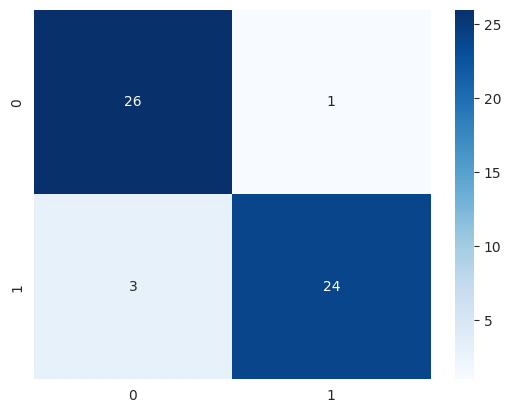

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.96      0.89      0.92        27

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



# KNN

Text(0, 0.5, 'Error Rate')

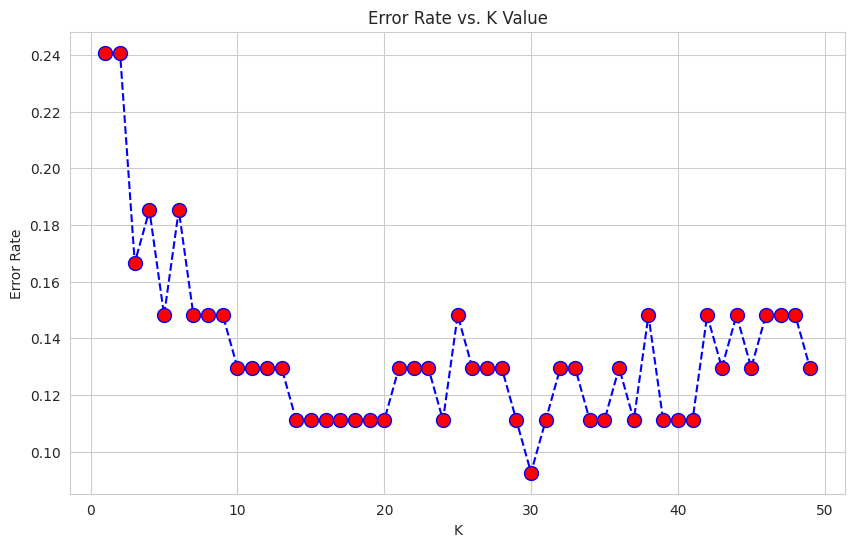

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#choosing K value

error_rate = []

# Will take some time
for i in range(1,50):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:. K-Nearest Neighbour Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. K-Nearest Neighbour Accuracy: 88.89% .:.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  1]
 [ 5 22]]


<Axes: >

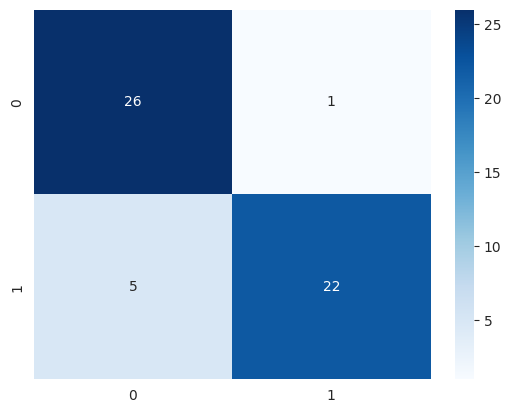

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



## SVC with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] }#radial basis function kernel

grid = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

grid_predictions = grid.predict(x_test)

print(confusion_matrix(y_test, grid_predictions))
metrics.accuracy_score(grid_predictions,y_test)

[[24  3]
 [ 4 23]]


0.8703703703703703

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
svc = SVC(kernel='linear', C=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9074074074074074

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:. SVC Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. SVC Accuracy: 90.74% .:.


In [ ]:
svc.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  2]
 [ 3 24]]


<Axes: >

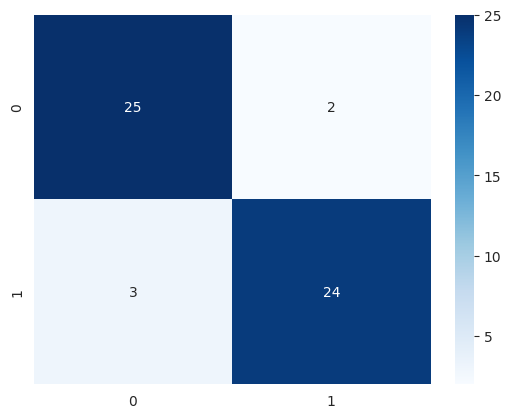

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.92      0.89      0.91        27

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
dtc = DecisionTreeClassifier(max_depth=25)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8703703703703703

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:.DecisionTreeClassifier Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:.DecisionTreeClassifier Accuracy: 87.04% .:.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  2]
 [ 5 22]]


<Axes: >

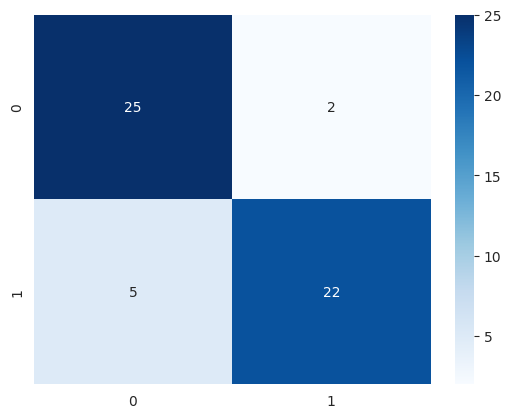

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.92      0.81      0.86        27

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54



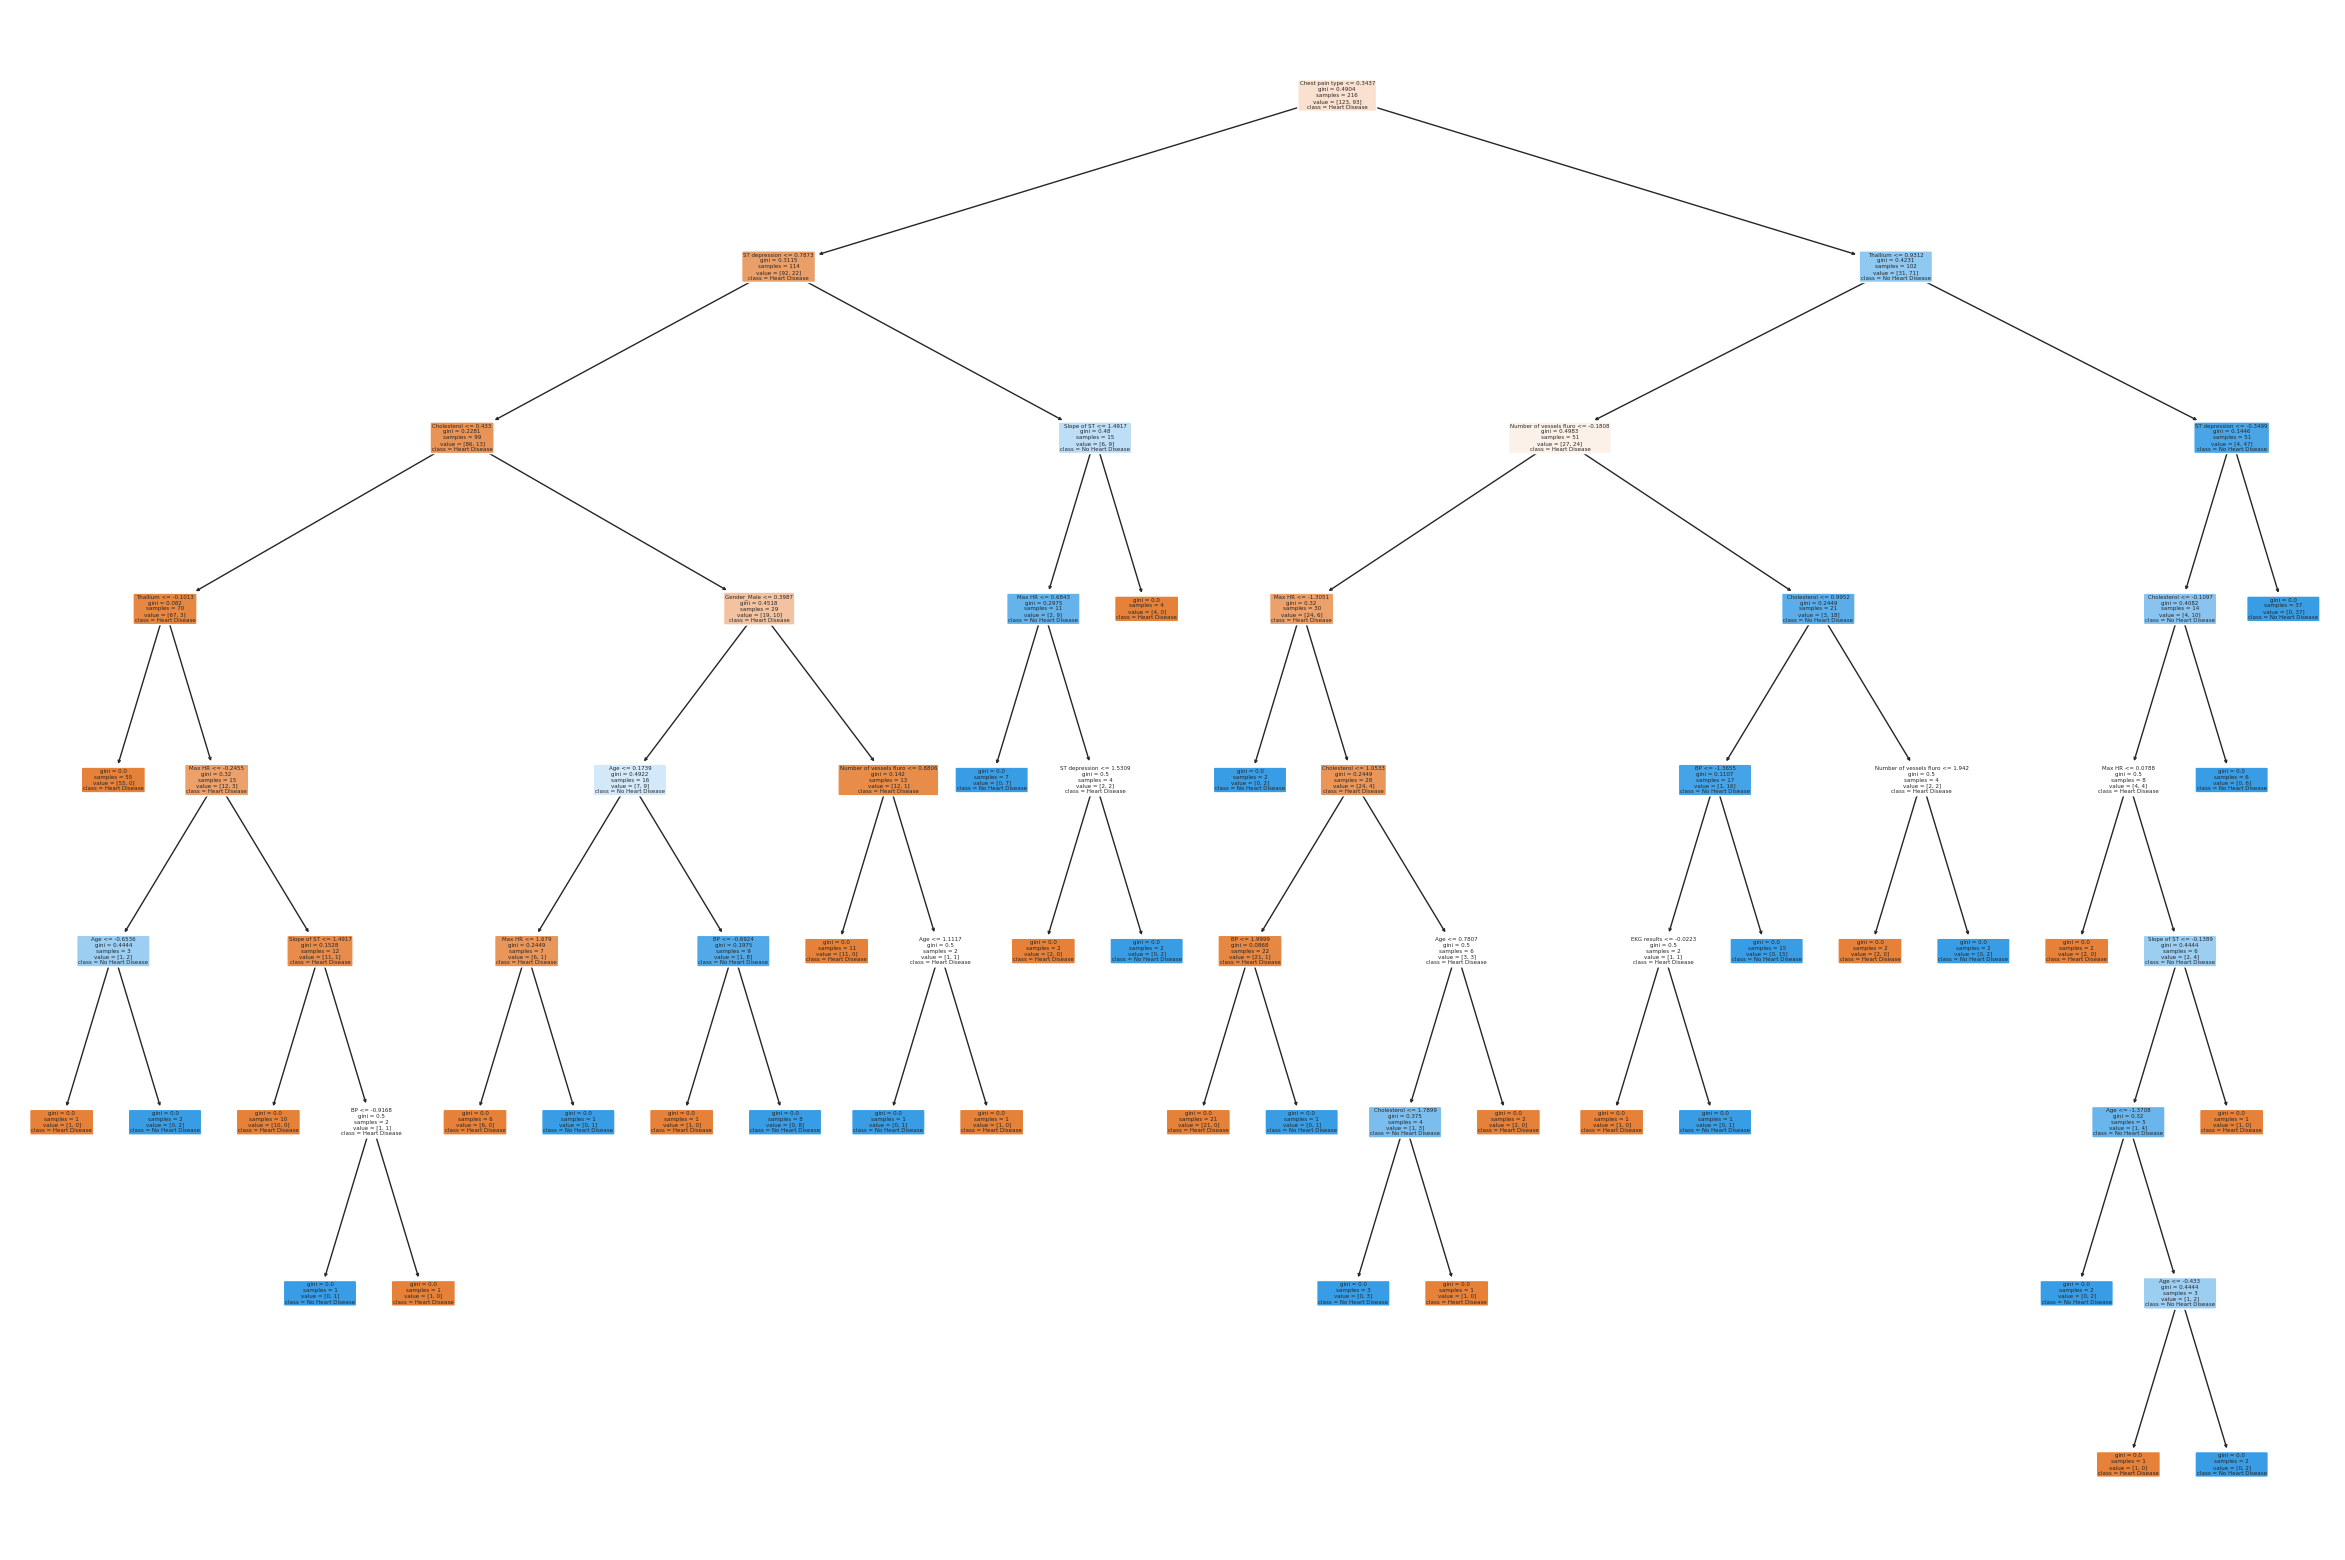

In [ ]:
#for visualizing tree
from sklearn.tree import plot_tree
# Visualising the graph without the use of graphviz

plt.figure(figsize = (30,20))
dec_tree = plot_tree(decision_tree=dtc, feature_names = features.columns,
                     class_names =["Heart Disease", "No Heart Disease"] , filled = True , precision = 4, rounded = True)

plt.savefig("one.png")

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
rfc = RandomForestClassifier(max_leaf_nodes=50,max_depth=50)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:. RandomForestClassifier Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. RandomForestClassifier Accuracy: 88.89% .:.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  1]
 [ 5 22]]


<Axes: >

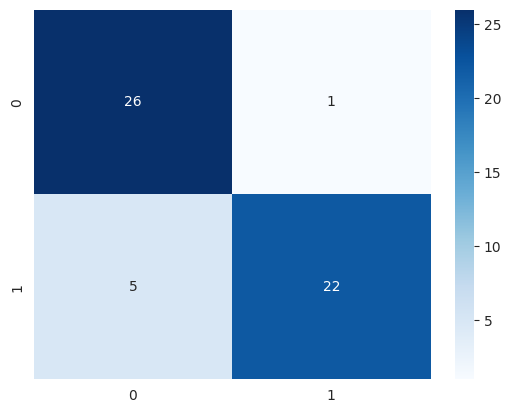

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.96      0.81      0.88        27

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54



#Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accuracy_score(y_test, y_pred)

0.8703703703703703

In [ ]:
Acc = accuracy_score(y_pred, y_test)
print('.:. Naive Bayes Model Accuracy:'+'\033[1m {:.2f}%'.format(Acc*100)+' .:.')

.:. Naive Bayes Model Accuracy: 87.04% .:.


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[24  3]
 [ 4 23]]


<Axes: >

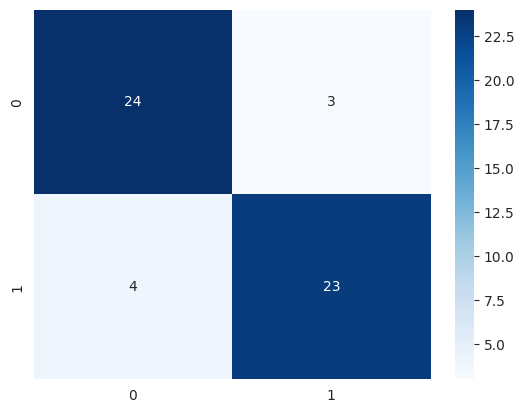

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')


In [ ]:
# Print precision, recall, and F1-score for all classes
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.88      0.85      0.87        27

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



the best model act with the data is logistic regression model so we will save it for the deployment

# Deployment

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
import joblib
joblib.dump(reg, 'model.joblib')

['model.joblib']

# User Trial

In [ ]:
print("welcome to our medical system for prediction Heart disease \n Enter The Following features of the patient from the report \n ")
age=input("Age : ")
chest_pain=float(input("Chest Pain Type : "))
bp=float(input("Blood Pressure : "))
ch=float(input("Cholesterol : "))
ekg=float(input("EKG results : "))
Max_hr=float(input("Max HR : "))
Exercise_ang=float(input("Exercise angina : "))
ST=float(input("ST depression : "))
Slope=float(input("Slope of ST : "))
nov=float(input("Number of vessels fluro : "))
Thallium=float(input("Thallium : "))
gender=float(input("Gender : (male=1 ; female=0)"))
inp=[age,chest_pain,bp,ch,ekg,Max_hr,Exercise_ang,ST,Slope,nov,Thallium,gender]
input_arr=np.array(inp,dtype=float)
output = reg.predict([input_arr])

welcome to our medical system for prediction Heart disease 
 Enter The Following features of the patient from the report 
 
Age : 28
Chest Pain Type : 1
Blood Pressure : 120
Cholesterol : 26
EKG results : 12
Max HR : 100
Exercise angina : 1
ST depression : 125
Slope of ST : 25
Number of vessels fluro : 36
Thallium : 26
Gender : (male=1 ; female=0)1


In [ ]:
if(output==1):
  print("the result of the test is that you have heart disease")
else:
  print("Congratulations! You don't have heart disease")

the result of the test is that you have heart disease
